In [251]:
import numpy as np
import pandas as pd
import scanpy as sc
import scanpy.external as sce
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=150, dpi_save= 300, fontsize=10, frameon=True, figsize=(2, 2), transparent=False, format="pdf")

-----
anndata     0.7.5
scanpy      1.8.1
sinfo       0.3.1
-----
PIL                 8.1.1
anndata             0.7.5
anyio               NA
argon2              20.1.0
asciitree           NA
attr                20.3.0
babel               2.9.0
backcall            0.2.0
beta_ufunc          NA
binom_ufunc         NA
brotli              NA
cairo               1.20.0
certifi             2021.10.08
cffi                1.14.5
chardet             4.0.0
cloudpickle         1.3.0
colorama            0.4.4
cycler              0.10.0
cython_runtime      NA
dask                2021.02.0
dateutil            2.8.1
decorator           4.4.2
fasteners           NA
future_fstrings     NA
google              NA
h5py                2.10.0
idna                2.10
igraph              0.8.3
ipykernel           5.5.0
ipython_genutils    0.2.0
jedi                0.18.0
jinja2              2.11.3
joblib              1.0.1
json5               NA
jsonschema          3.2.0
jupyter_server      1.7.0
jupyterlab_s

In [64]:
intestine_integrated = sc.read_h5ad("./../../../pyobjs_github/intestine_1.h5ad")

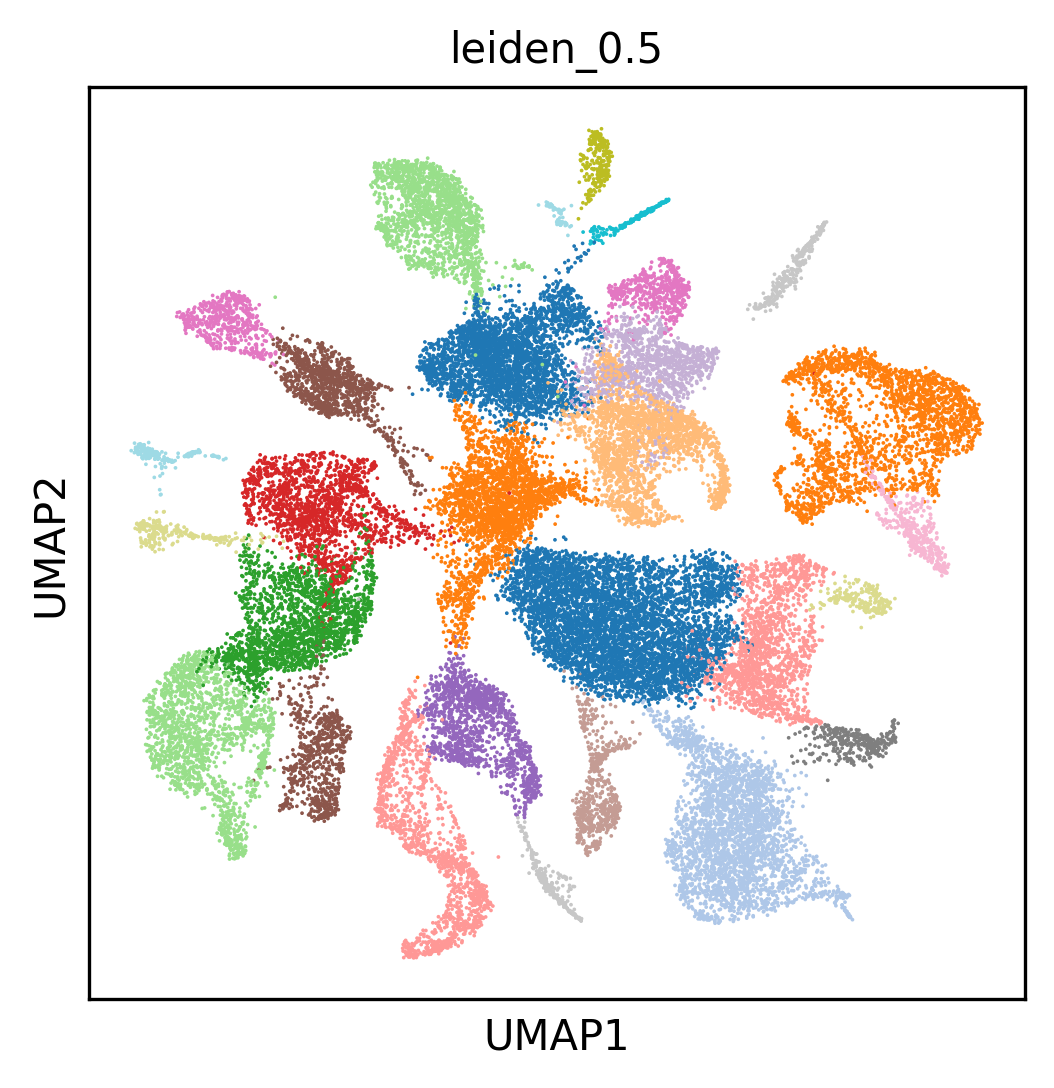

In [141]:
sc.settings.set_figure_params(dpi=150, dpi_save= 300, fontsize=10, frameon=True, figsize=(4, 4), transparent=False, format="pdf")
sc.pl.umap(intestine_integrated, color = ["leiden_0.5"], palette="tab20", legend_loc = "none")

In [ ]:
sc.pl.umap(intestine_integrated, color = ["leiden_0.5"], palette="tab20", legend_loc = "none")

In [66]:
muscle_clusters = ["1", "5", "7", "13", "17", "23", "26", "28"]
intestine_muscle = intestine_integrated.raw.to_adata()[intestine_integrated.obs['leiden_0.5'].isin(muscle_clusters)]
print(intestine_muscle)

View of AnnData object with n_obs × n_vars = 9445 × 19652
    obs: 'sample', 'doublet_score', 'predicted_doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'phase', 'leiden_0.3', 'leiden_0.5'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden', 'leiden_0.3_colors', 'leiden_0.5_colors', 'leiden_0.5_sizes', 'neighbors', 'paga', 'pca', 'sample_colors', 'umap'
    obsm: 'X_pca', 'X_umap'


/home/mm2937/miniconda3/envs/python385/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


extracting highly variable genes
    finished (0:00:01)


Trying to set attribute `.uns` of view, copying.


--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


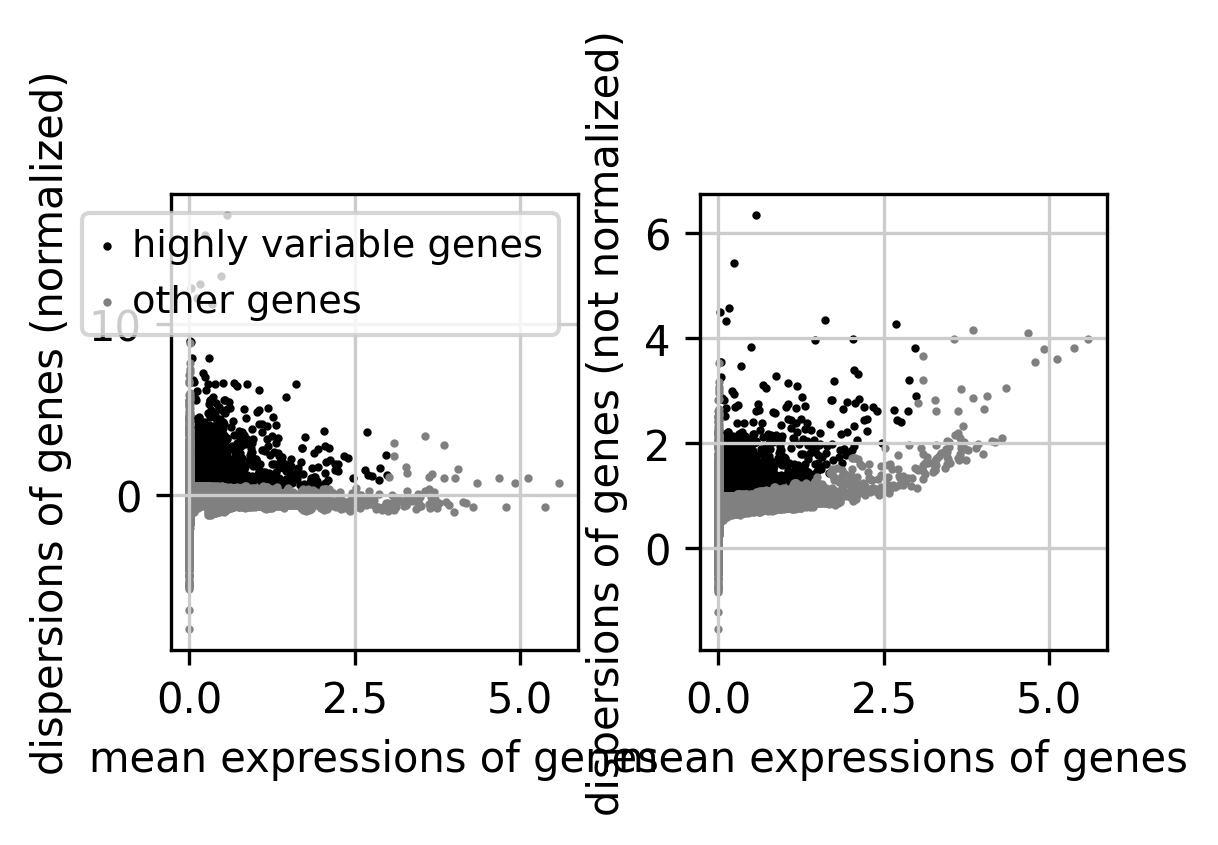

regressing out ['total_counts', 'pct_counts_mt', 'S_score', 'G2M_score']
    sparse input is densified and may lead to high memory use
    finished (0:00:29)
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:03)


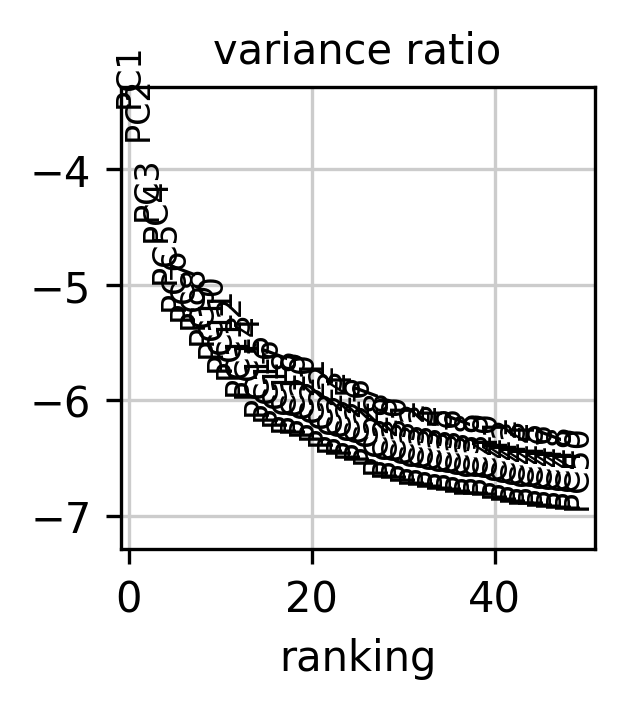

computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:10)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:10)
running Leiden clustering
    finished: found 15 clusters and added
    'muscle_leiden_0.5', the cluster labels (adata.obs, categorical) (0:00:00)


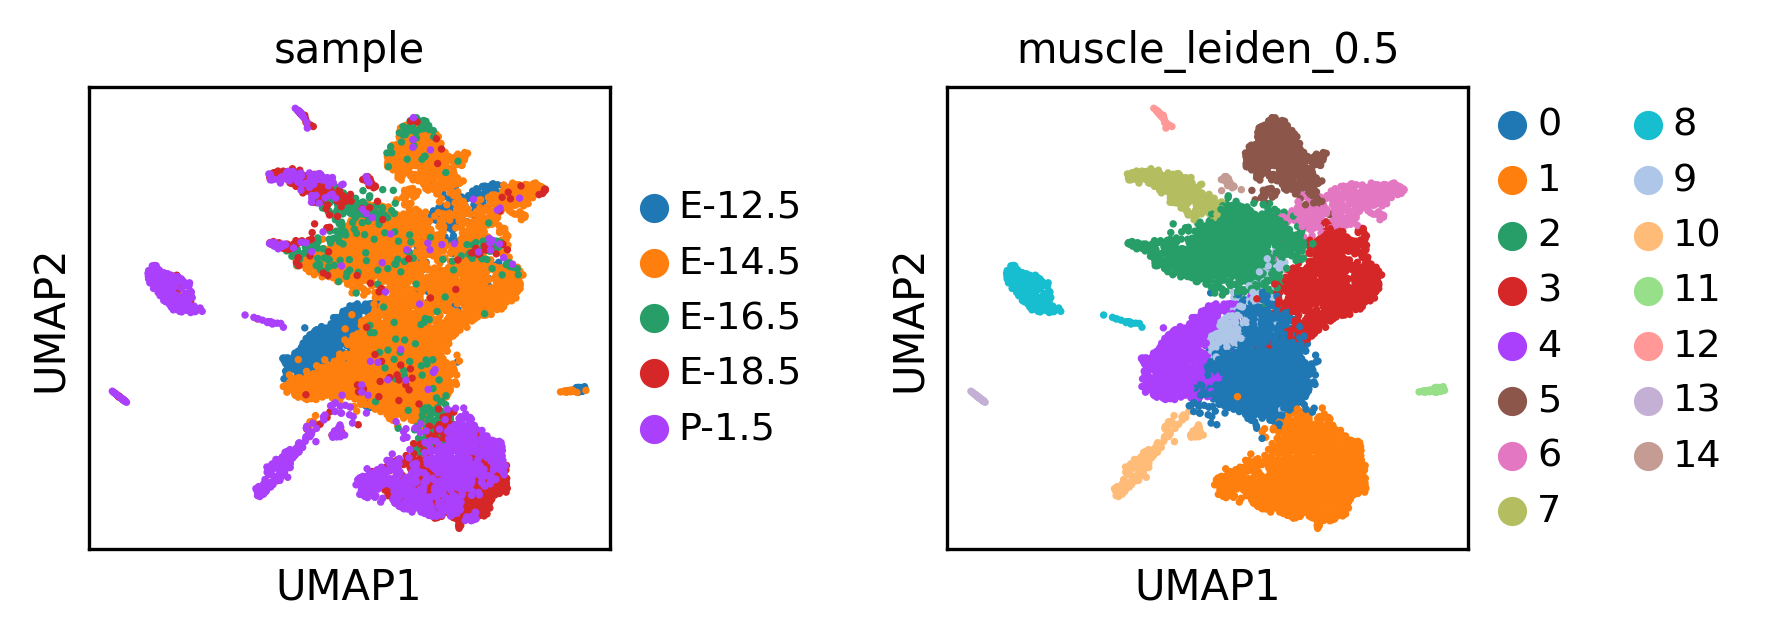

In [67]:
sc.pp.highly_variable_genes(intestine_muscle, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(intestine_muscle)
intestine_muscle.raw = intestine_muscle
intestine_muscle = intestine_muscle[:, intestine_muscle.var.highly_variable]
sc.pp.regress_out(intestine_muscle, ['total_counts', 'pct_counts_mt', 'S_score', 'G2M_score'], n_jobs=20)
sc.pp.scale(intestine_muscle, max_value=10)
sc.tl.pca(intestine_muscle, svd_solver='arpack', random_state=0)
sc.pl.pca_variance_ratio(intestine_muscle, n_pcs = 50, log=True)
sc.pp.neighbors(intestine_muscle, n_pcs=30)
sc.tl.umap(intestine_muscle)
sc.tl.leiden(intestine_muscle, key_added="muscle_leiden_0.5", resolution = 0.5)
sc.pl.umap(intestine_muscle, color=["sample", "muscle_leiden_0.5"], wspace=0.5)

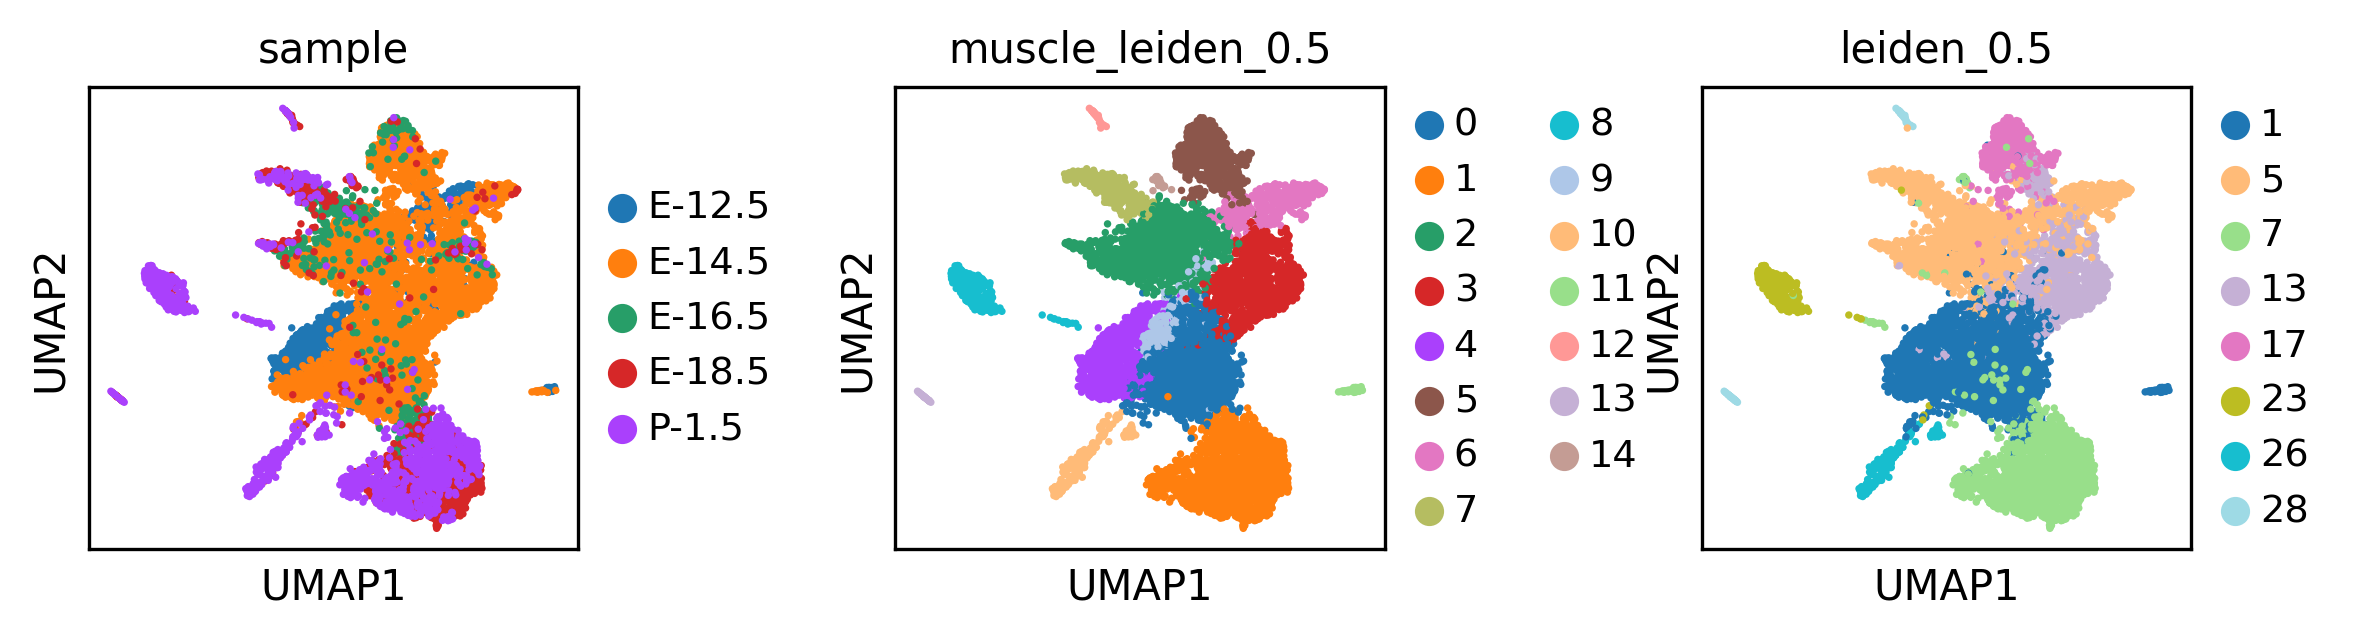

In [68]:
sc.pl.umap(intestine_muscle, color=["sample", "muscle_leiden_0.5", "leiden_0.5"], wspace=0.5)

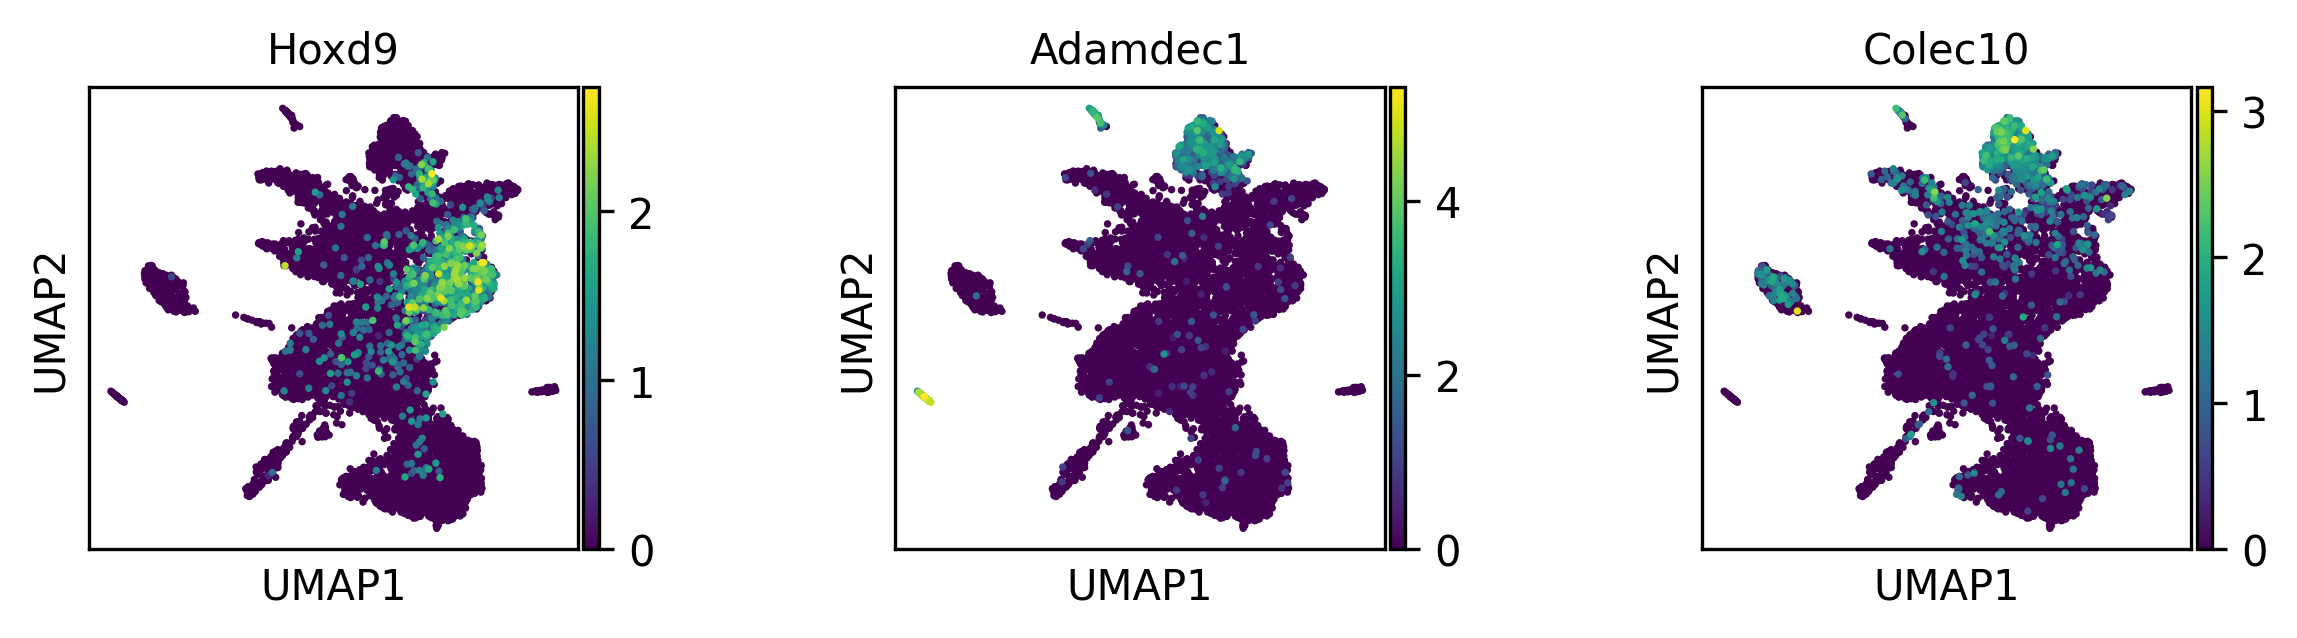

In [69]:
sc.pl.umap(intestine_muscle, color=["Hoxd9", "Adamdec1", "Colec10"], wspace=0.5)

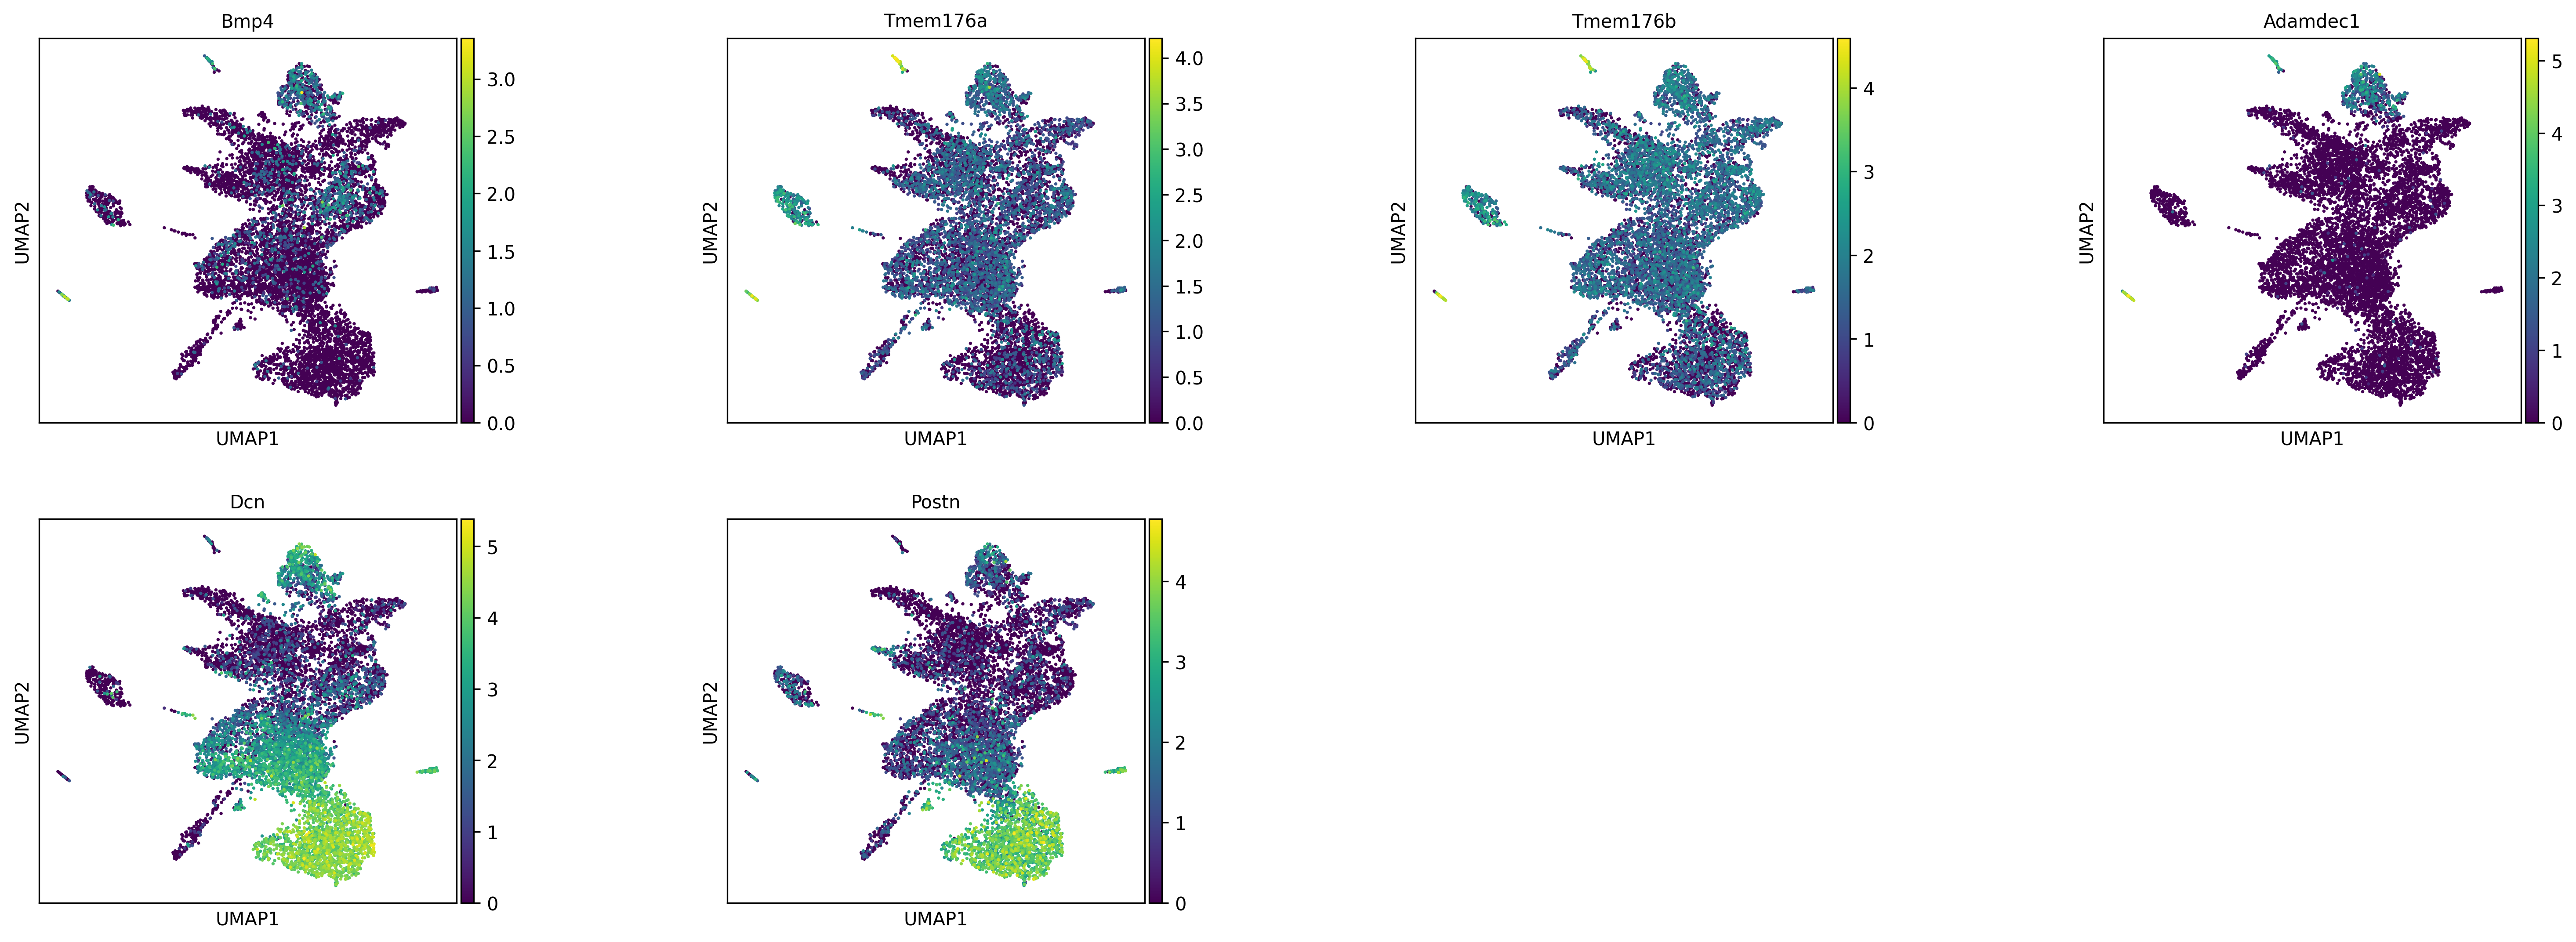

In [142]:
sc.pl.umap(intestine_muscle, color=['Bmp4', "Tmem176a", "Tmem176b", "Adamdec1", "Dcn", "Postn"], wspace=0.5)

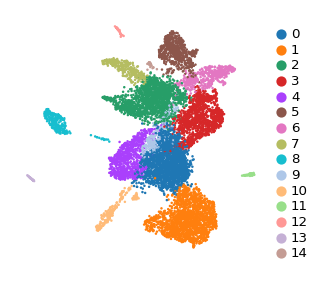

In [388]:
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=6, facecolor='white', frameon=True, figsize=(1.6, 1.6), vector_friendly = False, transparent=True, format="pdf")
fig, ax = plt.subplots(figsize = (2.0, 2.0))
sc.pl.umap(intestine_muscle, size=5, color = ['muscle_leiden_0.5'], legend_fontsize=6, frameon=False, title="", show=False, ax = ax)
plt.legend(ncol=1, prop={'size': 6}, handletextpad=0.5, markerscale = 0.6, frameon = False, labelspacing = 0.2, bbox_to_anchor = (1.0,1.0))
plt.savefig("figures/intestine_muscle_celltypes_umap.pdf")
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=6, facecolor='white', frameon=True, figsize=(3.0, 3.0), vector_friendly = False, transparent=True, format="pdf")

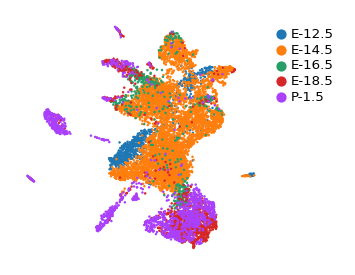

In [390]:
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=6, facecolor='white', frameon=True, figsize=(1.6, 1.6), vector_friendly = False, transparent=True, format="pdf")
fig, ax = plt.subplots(figsize = (2.0, 2.0))
sc.pl.umap(intestine_muscle, size=5, color = ['sample'], legend_fontsize=6, frameon=False, title="", show=False, ax = ax)
plt.legend(ncol=1, prop={'size': 6}, handletextpad=0.5, markerscale = 0.6, frameon = False, labelspacing = 0.2, bbox_to_anchor = (1.0,1.0))
plt.savefig("figures/intestine_muscle_stage_umap.pdf")
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=6, facecolor='white', frameon=True, figsize=(3.0, 3.0), vector_friendly = False, transparent=True, format="pdf")

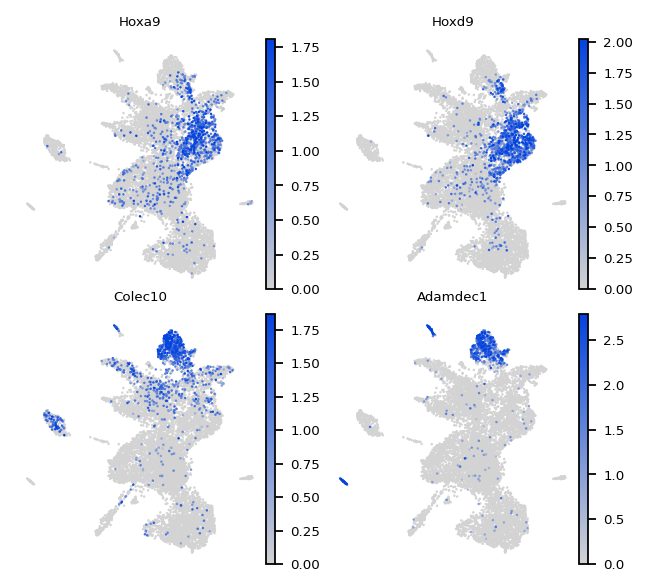

In [394]:
sc.settings.set_figure_params(dpi_save= 300, fontsize=6, figsize=(2.0,2.0), facecolor='white', frameon=True, vector_friendly = True, transparent=True, format="pdf")
sc.pl.umap(intestine_muscle, size = 5, color = ["Hoxa9", "Hoxd9", "Colec10", "Adamdec1"], legend_loc="none", cmap=sns.blend_palette(["lightgray", sns.xkcd_rgb["blue"]], as_cmap=True), frameon=False,  vmin=0, vmax='p99.2', ncols=2, wspace=0.15, hspace=0.1, save="colon_markers_muscle")

In [399]:
sc.tl.rank_genes_groups(intestine_muscle, groupby="muscle_leiden_0.5", key_added="rank_genes_groups_muscle_leiden_0.5")

ranking genes
    finished: added to `.uns['rank_genes_groups_muscle_leiden_0.5']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:03)


In [400]:
result = intestine_muscle.uns['rank_genes_groups_muscle_leiden_0.5']
groups = result['names'].dtype.names
celltype_markers = pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names']}).head(40)
celltype_markers

0_n       1_n            2_n            3_n            4_n       5_n  \
0      Dlk1       Dcn          Foxp2          Meis2           Peg3      Ptma   
1       Ptn     Postn          Meis2          Sox11           Isl1   Colec10   
2    Cdkn1c    Col3a1        Mab21l2         Igfbp2          Nr2f2     Snai2   
3     Slit2    Col1a2          Rps14          Hoxd9          Stmn2  Adamdec1   
4       Mdk    Col1a1          Foxp1          Isoc1          Sfrp1   Col14a1   
5     Csrp2       Gsn         Mpped2            Fst          Capn6      Cd63   
6      Calr    S100a6            Psd           Ptma          Palld     Fibin   
7     Rpl12    Col6a1           Lsp1         Hoxa10         Cxcl12      Gpc6   
8     Rps23       Lum           Mylk           Nnat          Csrp2      Tpt1   
9     Rpl13     Sparc          Smoc2          Tgfbi           Igf1     Tcf21   
10     Mest   Col14a1          Rgs10         Hoxd10       Hsp90ab1     Hmgn1   
11    Rps20    Col6a2         Cox4i1       Atxn7l3b           Tac2     Rpl15   
12    Rpl28     Mfap5          Rps16       Hsp90ab1           Nnat     Foxf1   
13     Wnt4   S100a10        Col23a1          Prdx2            Mdk       Mif   
14   Rpl27a     Itih5           Tpt1            Mdk          Unc5c     Ccnd2   
15    Sfrp2      Gpc3         Rpl18a        Mab21l2           Prnp      Rgs5   
16    Rps14       Vim          Timp3         Hoxd11          Pitx2   Mab21l2   
17    Sulf2    Col5a1  A830018L16Rik          Basp1          Abcg2  Ppp1r14a   
18    Rps19      Nid1           Rps5         Igfbp5          Scrn1  Hsp90aa1   
19    Rps10    Igfbp7          Rpl15          Hoxa9          Ncam1      Oaz1   
20    Nr2f2     Itm2a        Cox7a2l         Crabp2          Mtch1    Atp5g2   
21   Marcks    Col6a3           Rpl5          Cd24a            Mif      Gpx3   
22    Rpl32   Sparcl1          Foxf1  2600014E21Rik        mt-Nd4l      Rpsa   
23    Rpl14      Cd34           Ldhb       Marcksl1        Gm42418      Ybx1   
24    Rps11      Peg3          Rps19            Set          Zfhx4      Idh2   
25   Eef1b2      Vcan          Rps24          Gsta4            Tnc       Lum   
26    Rps18      Ebf1          Acta2          Eef1g          Mmp16      Zeb2   
27    Rpl19    Clec3b          Pde5a         Hoxc10  6330403K07Rik     Ptch1   
28    Anxa2      Zim1          Uqcrh          Hmgn1           Npm1     H2afz   
29   Rps15a       Bgn           Npm1           Nfib        Fam198b     Hint1   
30    Rpl11     Crip1          Rpl23           Fbn2       Adamtsl1     Rps4x   
31    Rpl18     Ahnak          Rpl18  6330403K07Rik           Rps7    Rpl18a   
32   Cxcl12     Matn2         Rps27a          Htra1           Zeb2      Cdk4   
33  Sparcl1    Col5a2           Etv1           Npm1         Cdkn1c  Atxn7l3b   
34   Col3a1  Serping1         Atp5g2           Sub1          Gata6     Robo2   
35     Ppib     Fstl1         Rps3a1      Hist3h2ba        Tnfaip8      Sox4   
36   Lgals1      Tnxb       Hsp90ab1           Cbx1          Grb10     Rps16   
37    Pdia6     Ltbp4          Rps4x          Rps14           Cux2      Mgll   
38    Eef1g    Col5a3          Rps23          Tcf21          Slit2     Rps19   
39    Rpl23    Pcolce           Rgmb          Rps19  5033428I22Rik     Rplp0   

        6_n       7_n       8_n        9_n      10_n      11_n      12_n  \
0     Acta2      Etv1    Col4a1      H2afz     Crip1    Col1a1     Plpp3   
1     Actg2       Kit    Igfbp7      Stmn1    Igfbp7    Col1a2  Tmem176b   
2      Mylk       Cpe    Col4a2      H2afv    Col4a1      Peg3   Aldh1a3   
3      Myl6     Foxf1   Col18a1      Cenpa     Cald1    Col5a2    Ifitm3   
4      Myl9   Chchd10      Ebf1      Birc5      Mcam       Dcn       Bgn   
5     Cald1   mt-Cytb    Pdgfrb    Selenoh     Itga1    Col3a1  Tmem176a   
6      Tpm1    mt-Nd4      Myh9      Ccnb2    Notch3       Fn1      Hhip   
7     Myh11      Nrp2      Rgs5       Ptma      Myl9    Plagl1   Rarres2   
8      Dstn     Ap1s2      Mcam     Nucks1 

In [190]:
small_muscle = intestine_muscle.raw.to_adata()[~intestine_muscle.obs['muscle_leiden_0.5'].isin(["3", "5", "11", "12", "13", "14"])]
small_muscle.shape

/home/mm2937/miniconda3/envs/python385/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


(7519, 19652)

extracting highly variable genes
    finished (0:00:06)


Trying to set attribute `.uns` of view, copying.


--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


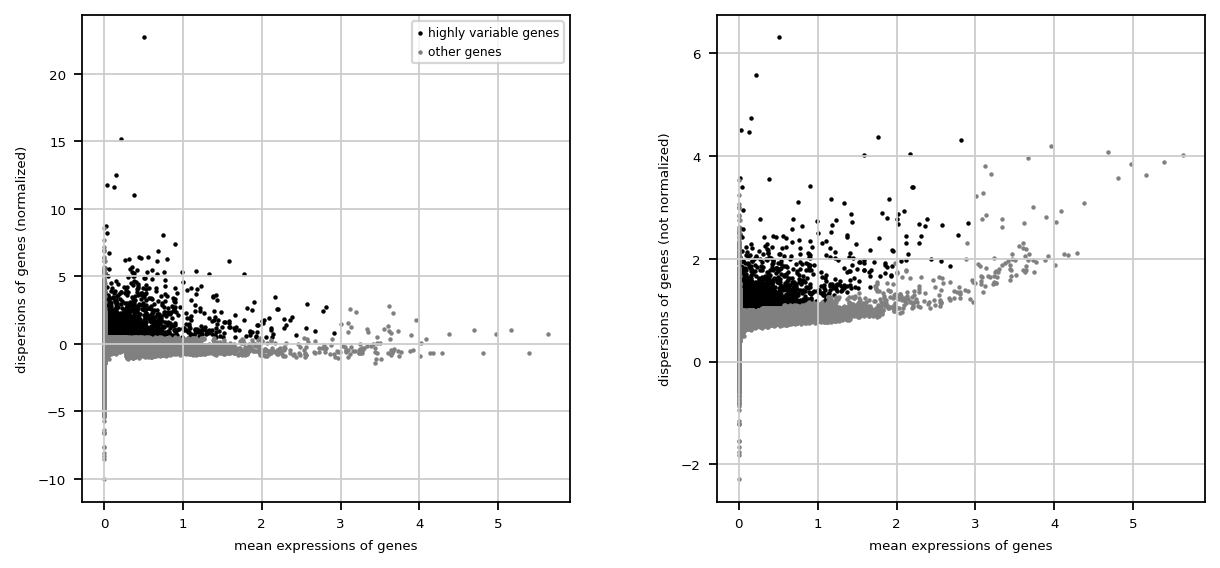

regressing out ['total_counts', 'pct_counts_mt', 'S_score', 'G2M_score']
    sparse input is densified and may lead to high memory use
    finished (0:02:22)
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:03)


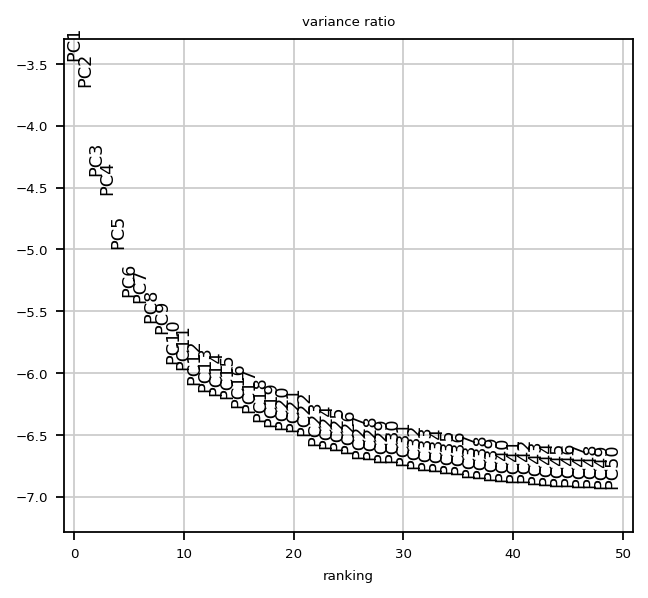

computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:16)
running Leiden clustering
    finished: found 10 clusters and added
    'muscle_leiden_0.5', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 11 clusters and added
    'muscle_leiden_0.6', the cluster labels (adata.obs, categorical) (0:00:00)


In [191]:
sc.pp.highly_variable_genes(small_muscle, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(small_muscle)
small_muscle.raw = small_muscle
small_muscle = small_muscle[:, small_muscle.var.highly_variable]
sc.pp.regress_out(small_muscle, ['total_counts', 'pct_counts_mt', 'S_score', 'G2M_score'], n_jobs=20)
sc.pp.scale(small_muscle, max_value=10)
sc.tl.pca(small_muscle, random_state=0)
sc.pl.pca_variance_ratio(small_muscle, n_pcs = 50, log=True)
sc.pp.neighbors(small_muscle, n_pcs=30)
sc.tl.umap(small_muscle)
sc.tl.leiden(small_muscle, key_added="muscle_leiden_0.5", resolution = 0.5)
sc.tl.leiden(small_muscle, key_added="muscle_leiden_0.6", resolution = 0.6)

In [192]:
sc.tl.leiden(small_muscle, key_added="muscle_leiden_0.7", resolution = 0.7)

running Leiden clustering
    finished: found 14 clusters and added
    'muscle_leiden_0.7', the cluster labels (adata.obs, categorical) (0:00:00)


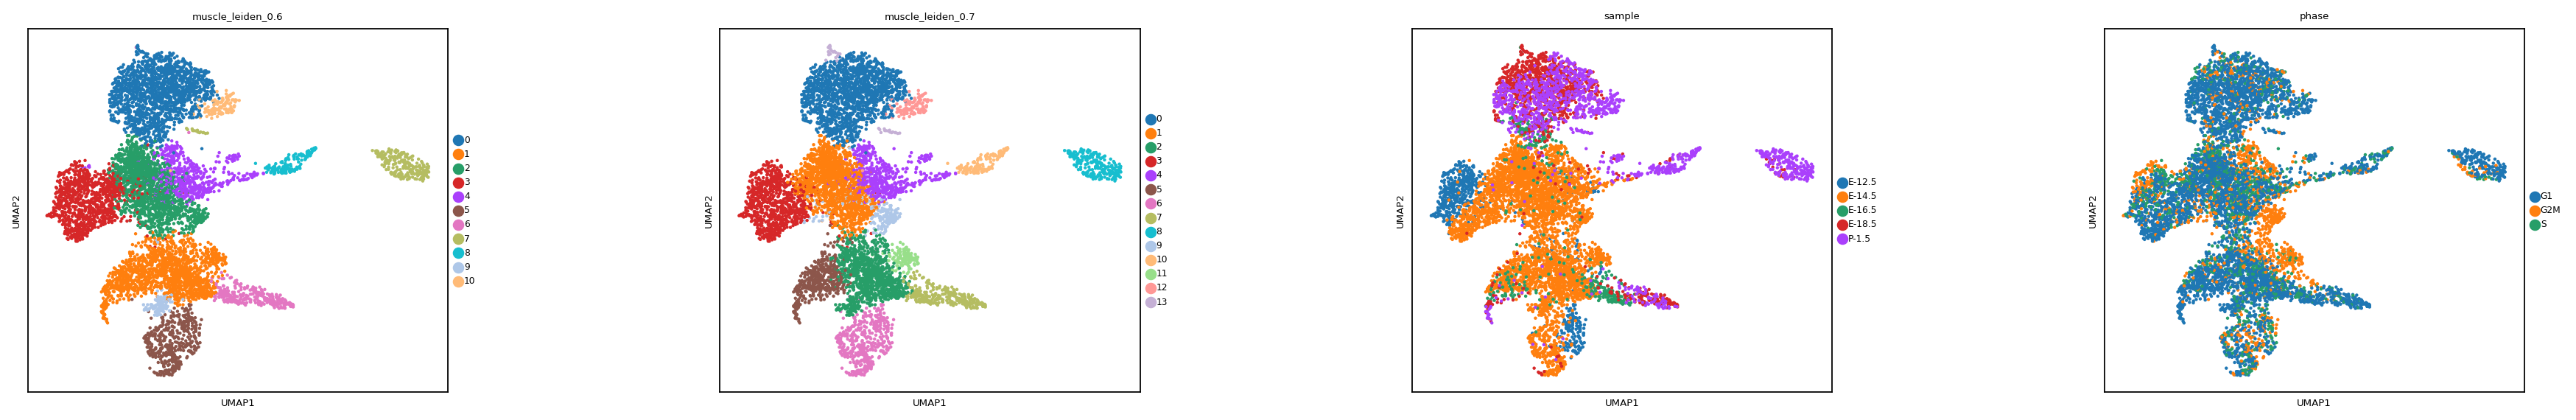

In [193]:
sc.pl.umap(small_muscle, color=["muscle_leiden_0.6","muscle_leiden_0.7", "sample", "phase"], wspace=0.5)

In [257]:
sc.tl.rank_genes_groups(small_muscle, groupby="muscle_leiden_0.7", key_added="rank_genes_groups_small_muscle_leiden_0.7")

ranking genes
    finished: added to `.uns['rank_genes_groups_small_muscle_leiden_0.7']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:06)


In [259]:
result = small_muscle.uns['rank_genes_groups_small_muscle_leiden_0.7']
groups = result['names'].dtype.names
celltype_markers = pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names']}).head(40)
celltype_markers

0_n      1_n       2_n            3_n        4_n       5_n      6_n  \
0        Dcn      Ptn     Meis2           Peg3       Ptma     Acta2    Acta2   
1      Postn   Cdkn1c     Rps14           Isl1      Tubb5      Myl6    Actg2   
2     Col3a1      Mdk   Mab21l2           Nnat      Fabp5      Myl9     Mylk   
3     Col1a2     Dlk1     Foxp2          Stmn2       Wnt4      Mylk     Myl6   
4     Col1a1    Sfrp2     Rps16            Mdk       Ppia      Tpm1     Myl9   
5        Gsn    Rpl12    Mpped2          Palld      H2afz     Tagln    Cald1   
6     S100a6   Rpl27a    Rpl18a          Sfrp1      Nr2f2      Cnn2     Tpm1   
7     Col6a1    Sulf2  Hsp90ab1       Hsp90ab1       Rbm3      Tpm2    Foxf1   
8        Lum     Calr     Foxp1          Nr2f2       Cdc7       Psd    Myh11   
9      Mfap5    Rps23      Npm1          Capn6      Sept7       Id2     Dstn   
10   Col14a1    Rpl13     Rpl15          Pitx2        Ran     Myh11      Ckb   
11     Itih5    Slit2   Col23a1            Mif       Ybx1     Alcam     Cnn1   
12    Col6a2    Rps19      Rps5        Gm42418      Pclaf     Foxp2    Tagln   
13     Sparc    Rpl18     Rps23           Tac2       Zeb2      Lsp1    Hmga2   
14   S100a10    Rpl19     Tgfbi          Ncam1   Hsp90aa1       Ckb     Actb   
15      Gpc3    Rps14      Ldhb           Igf1      Ccl11      Actb   Igfbp2   
16     Itm2a    Eef1g      Tpt1         Cxcl12    S100a11     Actg2     Tpm2   
17      Cd34    Rpl14      Rpl5          Csrp2      Eif5a     Meis2   Abracl   
18    Col5a1   Rps15a     Rpl18          Unc5c       Jag1      Dstn    Rbpms   
19    Clec3b    Rps20     Rps19  6330403K07Rik       Gnas      Cnn1    Mgst3   
20      Nid1    Rps10      Sub1          Scrn1       Heyl     Pde5a   Fermt2   
21    Igfbp7   Eef1b2     Rgs10          Zfhx4      Stmn1     Actg1     Cnn2   
22      Dlk1    Rpl26     Rpl30          Abcg2     Tuba1a     Foxp1   Pdlim7   
23    Col6a3    Rpl11    Atp5g2           Prnp     Ranbp1     Csrp1  Mab21l2   
24       Vim    Rps18    Rps27a           Npm1        Mif   Mab21l2     Cfl1   
25      Ebf1    Rpl23     Rps4x         Cxcl13      Top2a      Ppia      Psd   
26      Vcan   Rps27a     Foxf1         Igfbp5     Tmsb10     Cox8a     Flna   
27      Peg3    Rpl28      Rpl3          Mtch1       Cd63   Tgfb1i1    Ncam1   
28      Zim1    Rps11   Cox7a2l        mt-Nd4l      Hmgb2     Rbpms   Synpo2   
29    Col5a2    Csrp2      Rps9           Rps7   Hist1h1b     Lmod1    Myocd   
30   Sparcl1    Pdia6     Rps24        Tnfaip8       Tyms    Mpped2    Ccnd2   
31  Serping1     Npm1    Rps3a1       Adamtsl1      Spc24  Cdc42ep3     Rpl7   
32    Col5a3  Gm42418     Rpl34            Tnc      Acta2     Bend5   Fbxl22   
33     Fbln1    Rpl32    Cox4i1           Cux2   Ndufa4l2     Myocd    Foxp1   
34    Pcolce    Rps17     Rpl23          Mmp16      Srsf2      Flna     Nexn   
35      Tnxb      Mif     Rps13        Fam198b      Prdx4     Smoc2  Aldh1a1   
36     Fstl1    Rps16     Rpl14         Kif26b       Cdk1     Map1b    Hacd1   
37    Akap12    Rps13     Tcf21          Rpl11      Hspa8      Pfn1      Lpp   
38     Ahnak   Rpl18a      Etv1            Ntm  Hist1h2ae    Cox4i1    Stmn1   
39     Matn2    Rplp0      Naca          Prdx2   Rnaseh2c      Nexn    Cox5a   

         7_n       8_n        9_n     10_n       11_n     12_n     13_n  
0       Etv1    Col4a1      H2afz    Tagln      Hmgb2   Col1a2    Sparc  
1        Kit   Col18a1      Stmn1     Myl9      H2afz   Col3a1    Itm2b  
2      Foxf1    Igfbp7      H2afv   Igfbp7      Stmn1   Col1a1   Sptbn1  
3       Nrp2    Col4a2      Cenpa    Acta2      Pclaf      Dcn      App  
4    Chchd10    Pdgfrb      Birc5    Crip1      Tubb5      Bgn   Igfbp7  
5     mt-Nd4      Myh9     Tubb4b     Mcam      Top2a    Postn     Nid1  
6    mt-Cytb      Rgs5    Selenoh    Cald1       Ptma      Mgp   Tagln2  
7        Cpe      Ebf1      Ccnb2    Myh11      Spc24    Thbs2  S100a10  
8      Ap1s2   Gm13889        Ran     Tpm1      H2afv   Igfbp7

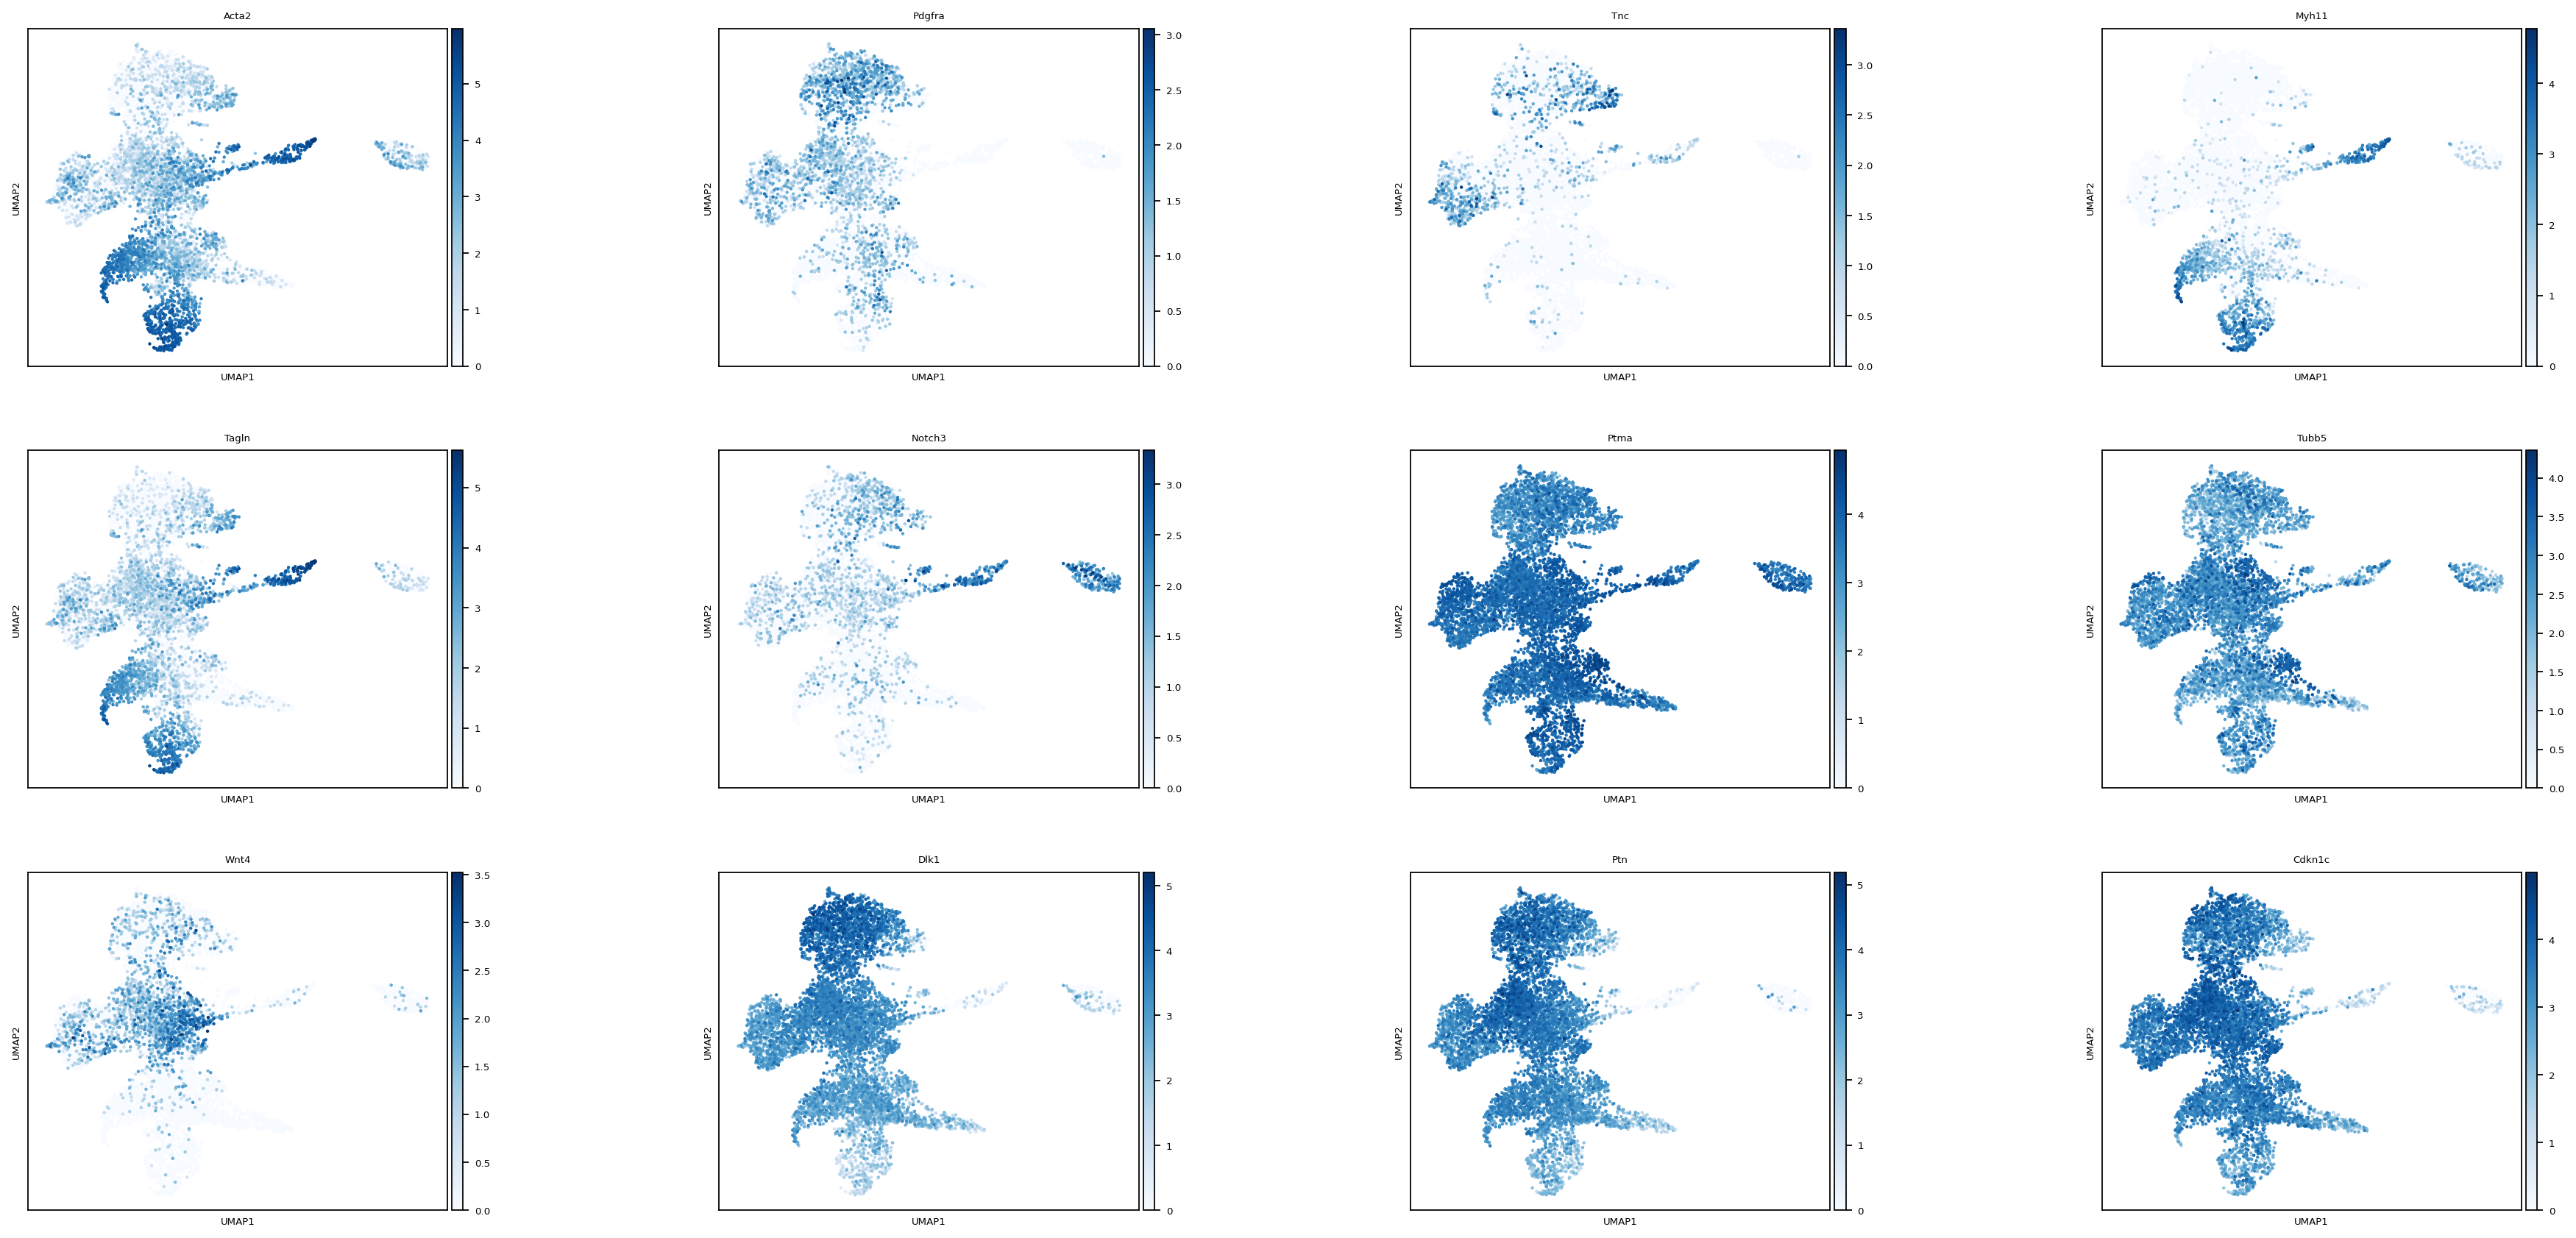

In [172]:
sc.pl.umap(small_muscle, color = ["Acta2", "Pdgfra", "Tnc", "Myh11", "Tagln", "Notch3", "Ptma", "Tubb5", "Wnt4", "Dlk1", "Ptn", "Cdkn1c"], wspace=0.5, cmap="Blues")


In [236]:
small_muscle.obs["clusters_muscle_leiden_0.7"] = small_muscle.obs["muscle_leiden_0.7"]
celltypes = {'0': "Pdgfra+ fibroblasts", 
             '1': "Mesenchymal progenitors-2", 
            '2': "Gut wall mesenchymal progenitors", 
            '3': "Mesenchymal progenitors-1", 
            '4': "Mesenchymal progenitors-3", 
            '5': "Smooth muscle-1 (Gut wall)", 
            '6': "Smooth muscle-2 (Gut wall)",
            '7': "ICCs (Gut wall)",
            '8': "Pericytes",
            '9': "Mesenchymal progenitors-2",
            '10': "Smooth muscle-3 (Villus axial)",
            '11': "Gut wall mesenchymal progenitors", 
            '12': "Tnc+ myofibroblast-like cells",
            '13': "Pdgfra+ fibroblasts"}
small_muscle.obs["clusters_muscle_leiden_0.7"] = small_muscle.obs["clusters_muscle_leiden_0.7"].map(celltypes).astype("category")

In [237]:
small_muscle.obs["clusters_muscle_leiden_0.7"] = small_muscle.obs["clusters_muscle_leiden_0.7"].astype("category")
small_muscle.obs["clusters_muscle_leiden_0.7"].cat.reorder_categories(
    new_categories = ["Mesenchymal progenitors-1",
            "Mesenchymal progenitors-2", 
            "Mesenchymal progenitors-3",
            "Gut wall mesenchymal progenitors", 
              "Smooth muscle-1 (Gut wall)", 
            "Smooth muscle-2 (Gut wall)",
            "ICCs (Gut wall)",
             "Pdgfra+ fibroblasts", 
             "Tnc+ myofibroblast-like cells",
            "Smooth muscle-3 (Villus axial)",
             "Pericytes"], inplace = True)

<ipython-input-237-ae06fdeac385>:2: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  small_muscle.obs["clusters_muscle_leiden_0.7"].cat.reorder_categories(


computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:20)


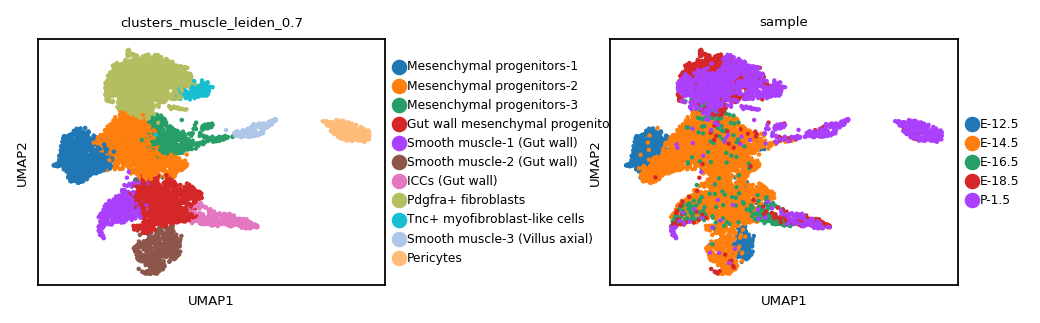

In [242]:
sc.tl.umap(small_muscle)
sc.pl.umap(small_muscle, color = ["clusters_muscle_leiden_0.7", "sample"], wspace=0.5)

running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])


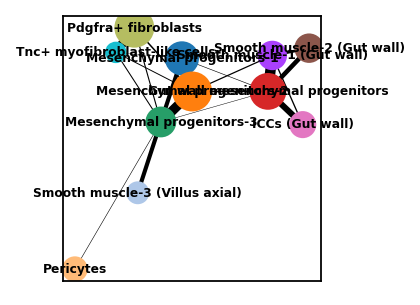

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:19)


In [239]:
sc.tl.paga(small_muscle, groups="clusters_muscle_leiden_0.7")
sc.pl.paga(small_muscle, threshold=0.014)
sc.tl.umap(small_muscle, init_pos="paga")

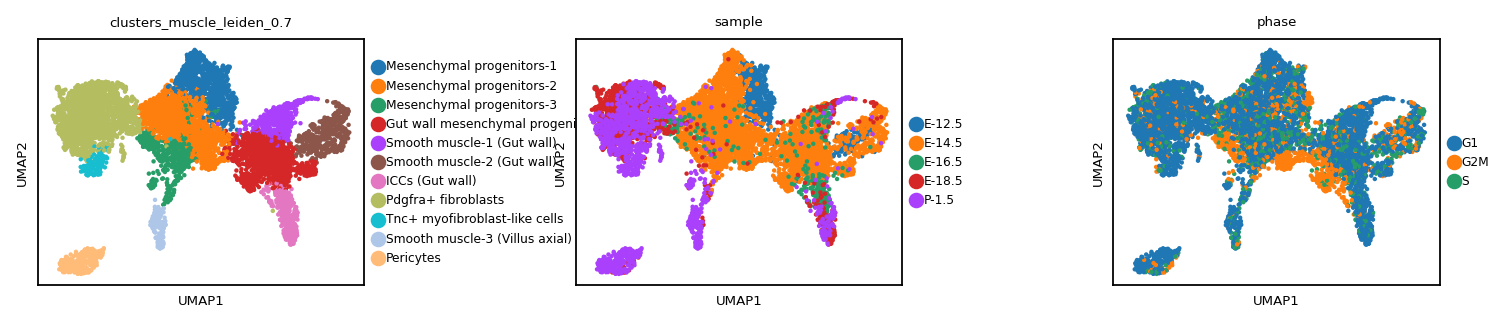

In [240]:
sc.pl.umap(small_muscle, color = ["clusters_muscle_leiden_0.7", "sample", "phase"], wspace=0.5)

--> added 'pos', the PAGA positions (adata.uns['paga'])


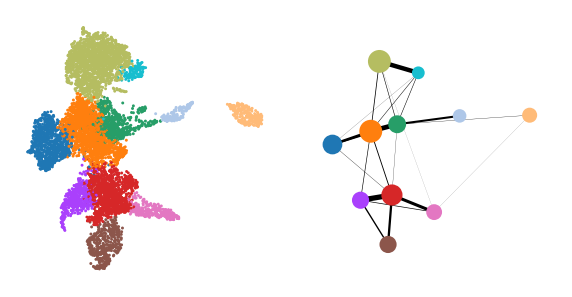

In [247]:
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=6, facecolor='white', frameon=True, figsize=(2.5, 2.0), vector_friendly = False, transparent=True, format="pdf")
sc.pl.paga_compare(small_muscle, legend_loc= "none", size = 7, labels = ["" for x in np.unique(small_muscle.obs["clusters_muscle_leiden_0.7"])], node_size_scale = 0.3, edge_width_scale = 0.5, title="", title_graph="", save="small_muscle_scatter_paga_compare")

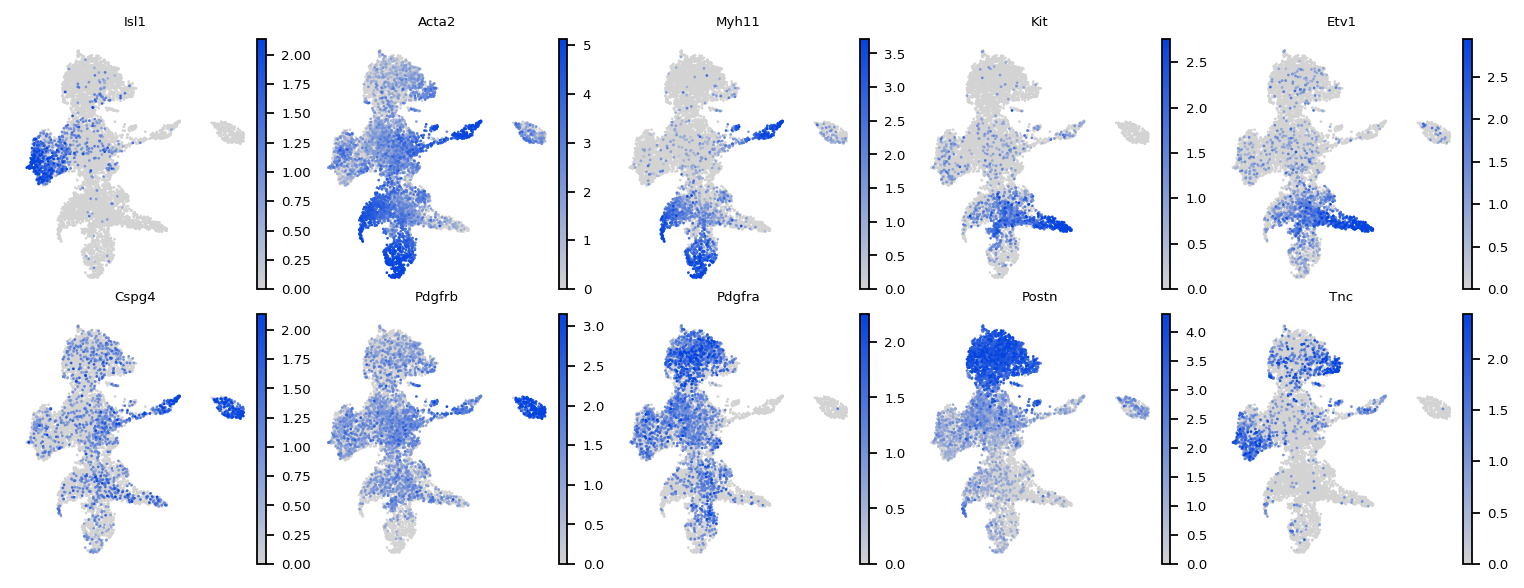

In [414]:
sc.settings.set_figure_params(dpi_save= 300, fontsize=6, figsize=(2.0,2.0), facecolor='white', frameon=True, vector_friendly = True, transparent=True, format="pdf")
sc.pl.umap(small_muscle, size = 6, color = ["Isl1", "Acta2", "Myh11", "Kit", "Etv1", "Cspg4", "Pdgfrb", "Pdgfra", "Postn", "Tnc"], legend_loc="none", cmap=sns.blend_palette(["lightgray", sns.xkcd_rgb["blue"]], as_cmap=True), frameon=False,  vmin=0, vmax='p99.2', ncols=5, wspace=0.15, hspace=0.1, save="small_muscle_markers")

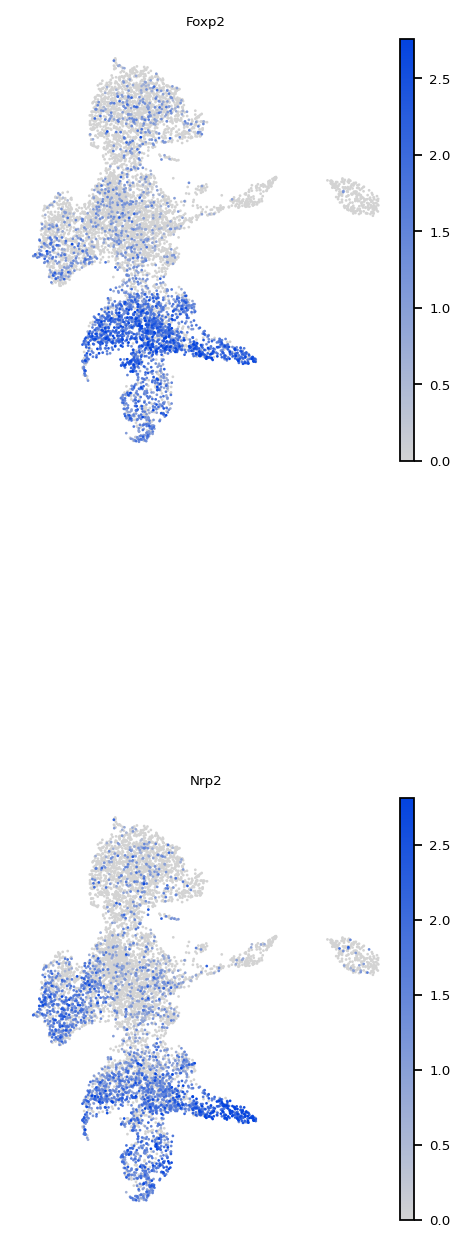

In [379]:
sc.settings.set_figure_params(dpi_save= 300, fontsize=6, figsize=(3.0,4.5), facecolor='white', frameon=True, vector_friendly = True, transparent=True, format="pdf")
sc.pl.umap(small_muscle, size = 6, color = ["Foxp2", "Nrp2"], cmap=sns.blend_palette(["lightgray", sns.xkcd_rgb["blue"]], as_cmap=True), frameon=False,  vmin=0, vmax='p99.2', ncols=1, wspace=0.1, hspace=0.8, save="small_muscle_markers1")

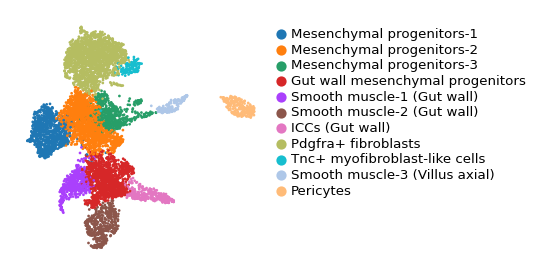

In [248]:
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=6, facecolor='white', frameon=True, figsize=(2.0, 2.0), vector_friendly = False, transparent=True, format="pdf")
fig, ax = plt.subplots(figsize = (2.0, 2.0))
sc.pl.umap(small_muscle, color = ['clusters_muscle_leiden_0.7'], size=6, legend_fontsize=6, frameon=False, title="", show=False, ax = ax)
plt.legend(ncol=1, prop={'size': 6}, handletextpad=0.5, markerscale = 0.6, frameon = False, labelspacing = 0.2, bbox_to_anchor = (1.0,1.0))
# plt.tight_layout()
plt.savefig("figures/muscle_celltypes_umap.pdf")
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=6, facecolor='white', frameon=True, figsize=(3.0, 3.0), vector_friendly = False, transparent=True, format="pdf")

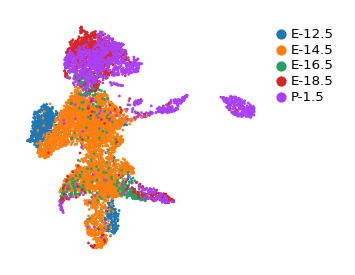

In [249]:
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=6, facecolor='white', frameon=True, figsize=(2.0, 2.0), vector_friendly = False, transparent=True, format="pdf")
fig, ax = plt.subplots(figsize = (2.0, 2.0))
sc.pl.umap(small_muscle, color = ['sample'], size=6, legend_fontsize=6, frameon=False, title="", show=False, ax = ax)
plt.legend(ncol=1, prop={'size': 6}, handletextpad=0.5, markerscale = 0.6, frameon = False, labelspacing = 0.2, bbox_to_anchor = (1.0,1.0))
# plt.tight_layout()
plt.savefig("figures/muscle_stage_umap.pdf")
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=6, facecolor='white', frameon=True, figsize=(3.0, 3.0), vector_friendly = False, transparent=True, format="pdf")

In [354]:
small_muscle.write_h5ad("./../../../pyobjs_github/small_muscle.h5ad")

In [4]:
small_muscle = sc.read_h5ad("./../../../pyobjs_github/small_muscle.h5ad")

In [415]:
sc.tl.dendrogram(small_muscle, groupby="clusters_muscle_leiden_0.7")

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_clusters_muscle_leiden_0.7']`


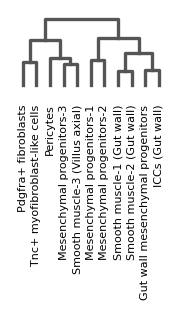

<AxesSubplot:>

In [443]:
sc.settings.set_figure_params(dpi_save= 400, fontsize=6, figsize=(1.2, 0.6), facecolor='white', frameon=True, transparent=True, format="pdf")
sc.pl.dendrogram(small_muscle, groupby="clusters_muscle_leiden_0.7", orientation="top", save="dendogram_muscle")

In [427]:
temp = small_muscle[small_muscle.obs["clusters_muscle_leiden_0.7"].isin([
              "Smooth muscle-1 (Gut wall)", 
            "Smooth muscle-2 (Gut wall)",
            "Smooth muscle-3 (Villus axial)"])]
sc.tl.rank_genes_groups(temp, groupby="clusters_muscle_leiden_0.7", key_added="rank_genes_groups_clusters_muscle_leiden_0.7_SM_only")

ranking genes


/home/mm2937/miniconda3/envs/python385/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
Trying to set attribute `.uns` of view, copying.


    finished: added to `.uns['rank_genes_groups_clusters_muscle_leiden_0.7_SM_only']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


In [428]:
result = temp.uns['rank_genes_groups_clusters_muscle_leiden_0.7_SM_only']
groups = result['names'].dtype.names
celltype_markers = pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'logfoldchanges','pvals']}).head(40)
celltype_markers

Smooth muscle-1 (Gut wall)_n  Smooth muscle-1 (Gut wall)_l  \
0                          Dlk1                      2.957463   
1                           Ptn                      2.728134   
2                         Alcam                      4.243528   
3                          Osr1                      4.975711   
4                          Meg3                      1.859249   
5                         Smoc2                      2.863727   
6                           Id2                      2.448772   
7                        Col6a1                      2.103640   
8                         Mfap4                      2.112006   
9                        Cdkn1c                      1.719966   
10                         Rbp1                      2.041780   
11                        Sfrp2                      3.436322   
12                       Plagl1                      1.945434   
13                        Sulf2                      2.488199   
14                        Celf2                      2.714446   
15                        Meis2                      1.532032   
16                          H19                      1.461671   
17                          Id1                      2.362164   
18                       Col1a1                      1.097940   
19                          Id3                      1.941040   
20                        Tshz2                      1.457500   
21                        Mfap2                      1.309085   
22                        Fxyd6                      2.276741   
23                        Bend5                      2.471682   
24                         Sfr1                      1.146905   
25                A830018L16Rik                      4.049483   
26                       Ifitm3                      1.303753   
27                       Col6a2                      1.693955   
28                         Lsp1                      1.409116   
29                        Itm2a                      1.550317   
30                       Igfbp4                      1.233957   
31                         Mest                      1.759650   
32                       Tceal9                      1.034043   
33                          B2m                      1.841020   
34                       Mapk13                      3.076677   
35                        Sulf1                      3.079862   
36                          Mdk                      1.195823   
37                        Tnnt1                      2.581366   
38                        Ephb1                      4.823016   
39                         Pbx1                      1.205227   

    Smooth muscle-1 (Gut wall)_p Smooth muscle-2 (Gut wall)_n  \
0                  7.744168e-172                        Hmga2   
1                  6.204374e-157                       Igfbp2   
2                  2.637361e-132                        Stmn1   
3                  2.267536e-101                        Foxf1   
4                  8.998877e-117                        Actg2   
5                   5.069486e-96                      Aldh1a2   
6                   7.099069e-90                      Aldh1a1   
7                   2.207784e-78                        Mgst3   
8                   2.254230e-78                         Lmo4   
9                   4.409909e-70                        Hmgb3   
10                  8.278375e-69                         Nnat   
11                  6.110857e-62                        Sox11   
12                  5.159836e-65                        Ncam1   
13                  6.312554e-61                        Kcnd3   
14                  1.195776e-55                       Cavin2   
15                  1.478576e-58                         Mgll   
16                  1.109503e-54                      Angptl6   
17                  3.451790e-48                       Sbspon   
18                  1.039865e-49                         Pcp4   
19                  5.332827e-48     

In [430]:
sc.tl.dendrogram(temp, groupby="clusters_muscle_leiden_0.7")

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_clusters_muscle_leiden_0.7']`


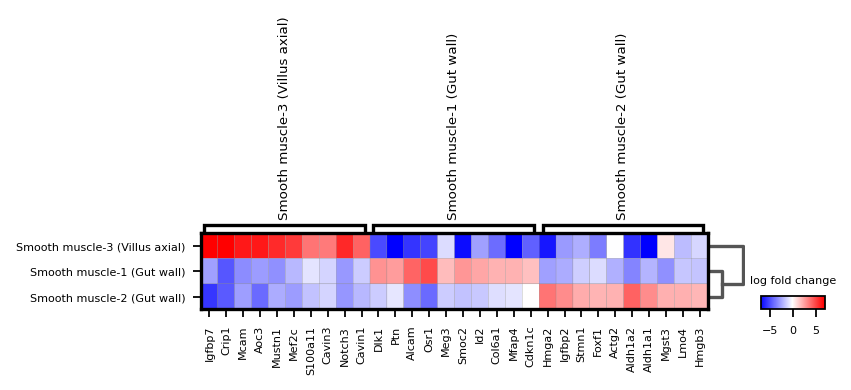

In [436]:
sc.settings.set_figure_params(dpi=80, dpi_save= 600, fontsize=6, frameon=True, figsize=(3, 3), transparent=True, vector_friendly = False, format="pdf")
fig, ax = plt.subplots(figsize = (5,1.5))
sc.pl.rank_genes_groups_matrixplot(temp, n_genes=10, key="rank_genes_groups_clusters_muscle_leiden_0.7_SM_only", values_to_plot='logfoldchanges', min_logfoldchange=1.0, vmax=7, vmin=-7, cmap='bwr', show=False, ax=ax)
# plt.tight_layout()
plt.savefig("./figures/smooth_muscle_dotplot.pdf")

In [423]:
sc.tl.rank_genes_groups(small_muscle, groupby="clusters_muscle_leiden_0.7", key_added="rank_genes_groups_clusters_muscle_leiden_0.7")

ranking genes
    finished: added to `.uns['rank_genes_groups_clusters_muscle_leiden_0.7']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)


In [402]:
result = small_muscle.uns['rank_genes_groups_clusters_muscle_leiden_0.7']
groups = result['names'].dtype.names
celltype_markers = pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'logfoldchanges','pvals']}).head(40)
celltype_markers

Mesenchymal progenitors-1_n  Mesenchymal progenitors-1_l  \
0                         Peg3                     1.886180   
1                         Isl1                     4.905148   
2                         Nnat                     1.936466   
3                        Stmn2                     3.369707   
4                          Mdk                     0.842319   
5                        Palld                     1.943956   
6                        Sfrp1                     1.686616   
7                     Hsp90ab1                     0.686816   
8                        Nr2f2                     1.433649   
9                        Capn6                     2.172657   
10                       Pitx2                     3.260390   
11                         Mif                     1.046231   
12                     Gm42418                     0.785608   
13                        Tac2                     3.634160   
14                       Ncam1                     1.470582   
15                        Igf1                     1.596314   
16                      Cxcl12                     1.065125   
17                       Csrp2                     1.209115   
18                       Unc5c                     1.996639   
19               6330403K07Rik                     1.251263   
20                       Scrn1                     3.319905   
21                       Zfhx4                     1.476873   
22                       Abcg2                     1.994400   
23                        Prnp                     1.521530   
24                        Npm1                     0.565308   
25                      Cxcl13                     3.062272   
26                      Igfbp5                     1.305958   
27                       Mtch1                     0.979589   
28                     mt-Nd4l                     1.342862   
29                        Rps7                     0.505355   
30                     Tnfaip8                     1.392193   
31                    Adamtsl1                     1.937074   
32                         Tnc                     2.526372   
33                        Cux2                     2.158107   
34                       Mmp16                     1.820656   
35                     Fam198b                     2.640863   
36                      Kif26b                     2.564970   
37                       Rpl11                     0.479160   
38                         Ntm                     2.287695   
39                       Prdx2                     0.633396   

    Mesenchymal progenitors-1_p Mesenchymal progenitors-2_n  \
0                 2.774601e-212                         Ptn   
1                 8.838404e-130                      Cdkn1c   
2                 5.592011e-119                         Mdk   
3                 5.482953e-110                       Sfrp2   
4                 7.398926e-122                        Dlk1   
5                 6.769202e-108                       Sulf2   
6                 2.616634e-108                        Calr   
7                 4.047802e-108                       Rpl12   
8                 4.662035e-103                       Rps23   
9                  1.086402e-95                       Rps19   
10                 2.588201e-88                      Rpl27a   
11                 1.724317e-89                       Rpl18   
12                 2.876999e-89                       Rpl19   
13                 5.249356e-81                       Rpl13   
14                 3.003189e-83                       Rps14   
15                 8.087911e-81                       Eef1g   
16                 1.382792e-80                       Slit2   
17                 1.709525e-77                      Eef1b2   
18                 1.611712e-75                      Rps15a   
19                 6.295266e-75                       Rpl14   
20                 9.639969e-72                       Rps10   
21                 7.905496e-73  

In [262]:
celltype_markers.to_csv("./../../../csvs_github/small_muscle_celltype_markers_top100.csv", index=False)

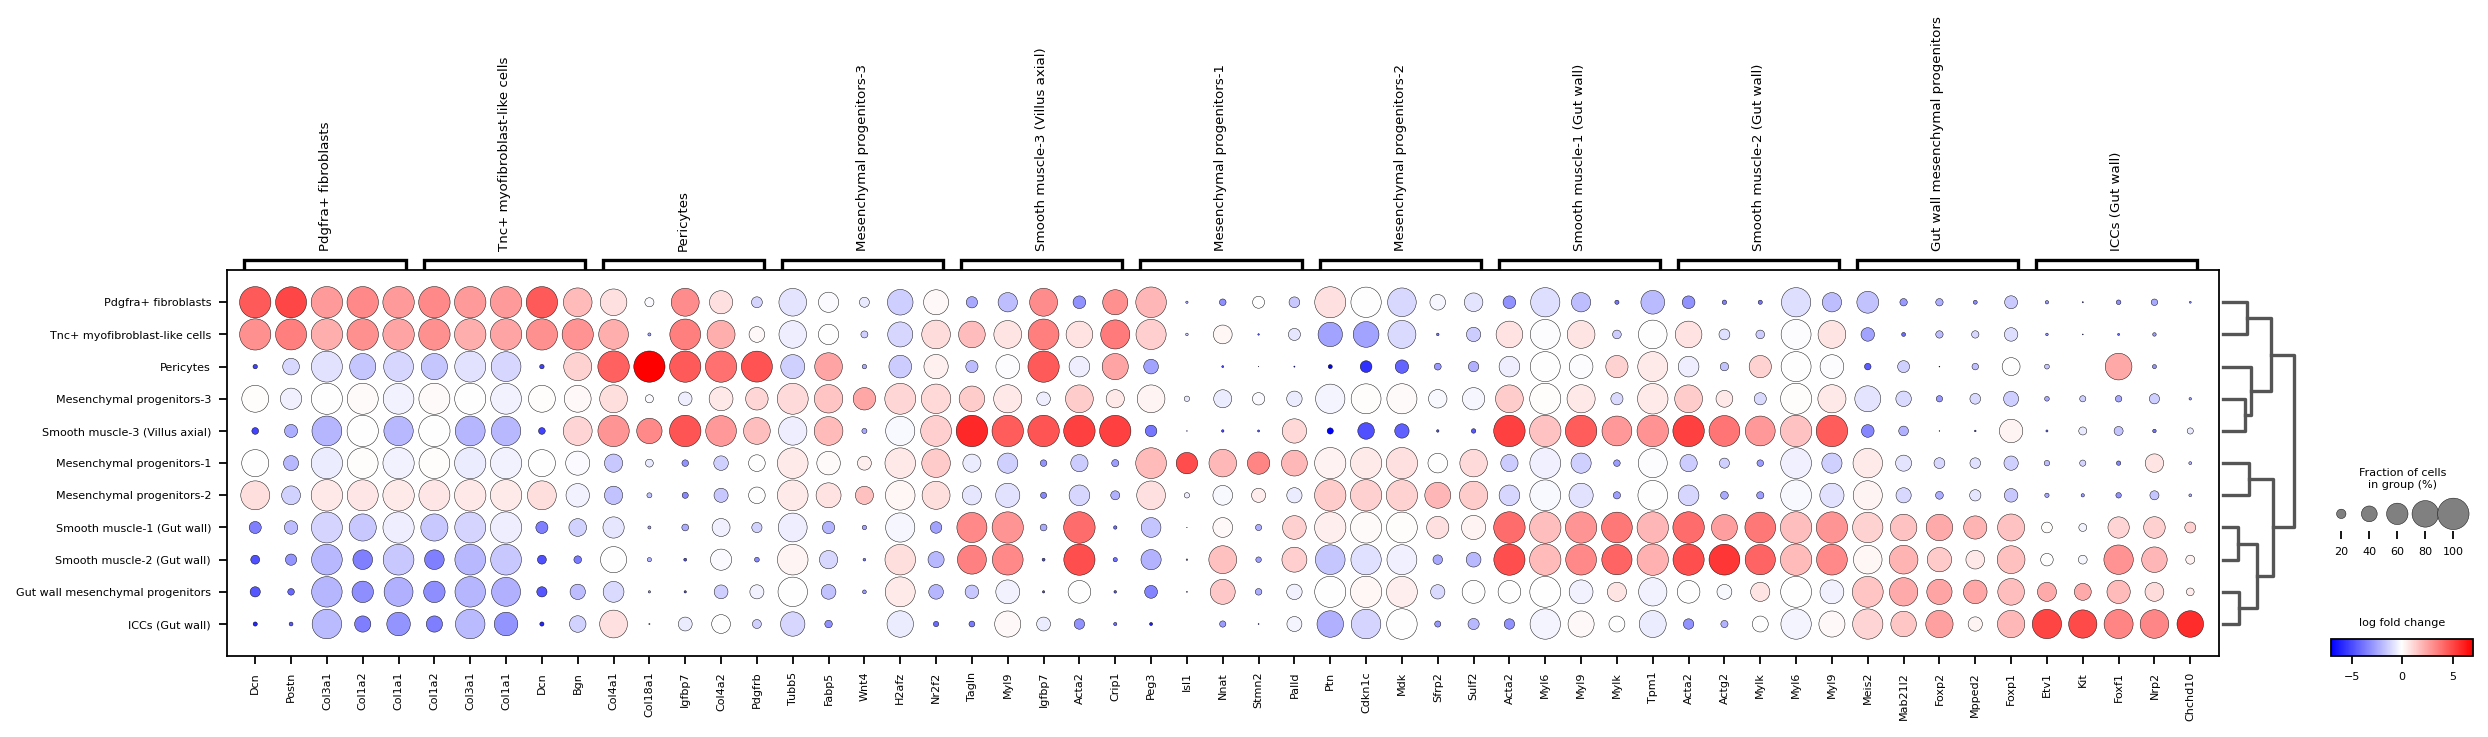

In [408]:
sc.settings.set_figure_params(dpi=80, dpi_save= 600, fontsize=6, frameon=True, figsize=(3, 3), transparent=True, vector_friendly = False, format="pdf")
fig, ax = plt.subplots(figsize = (18,4))
sc.pl.rank_genes_groups_dotplot(small_muscle, n_genes=5, key="rank_genes_groups_clusters_muscle_leiden_0.7", values_to_plot='logfoldchanges', min_logfoldchange=1.0, vmax=7, vmin=-7, cmap='bwr', show=False, ax=ax)
# plt.tight_layout()
plt.savefig("./figures/muscle_subclusters_dotplot.pdf")

/home/mm2937/miniconda3/envs/python385/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


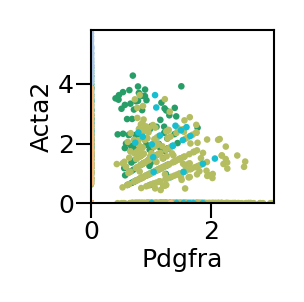

In [447]:
sc.settings.set_figure_params(dpi=150, dpi_save= 300, fontsize=6, frameon=True, figsize=(2, 2), transparent=False, format="pdf")
fig, ax = plt.subplots(figsize = (1.0, 1.0))
plt.margins(x=0, y=0, tight=False)
ax.tick_params(axis='both', which='major', pad=0.5)
plt.grid(b=None)
ax.set_axisbelow(True)
plt.setp(ax.spines.values(), linewidth=0.5)
ax.tick_params(width=0.5)
sc.pl.scatter(small_muscle[small_muscle.obs["clusters_muscle_leiden_0.7"].isin([
            "Mesenchymal progenitors-3",
             "Pdgfra+ fibroblasts", 
             "Tnc+ myofibroblast-like cells",
            "Smooth muscle-3 (Villus axial)",
             "Pericytes"])], x="Pdgfra", y="Acta2", size=10, color="clusters_muscle_leiden_0.7", ax = ax, show=False, title="")
plt.legend(ncol=1, prop={'size': 6}, handletextpad=0.5, markerscale = 2.0, frameon = False, labelspacing = 0.2, bbox_to_anchor = (1.0,1.0))
plt.xlabel("Pdgfra", labelpad=1)
plt.ylabel("Acta2", labelpad=1)
ax.get_legend().remove()

plt.tight_layout()
# plt.show()
plt.savefig("figures/scatter_Acta2_pdgfra.pdf", facecolor='w', edgecolor='w',
        orientation='potrait', format="pdf",
        transparent=True, metadata=None)

/home/mm2937/miniconda3/envs/python385/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


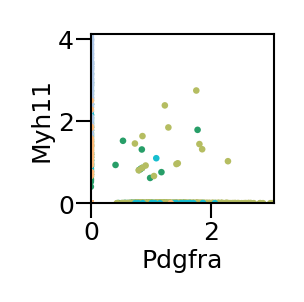

In [448]:
sc.settings.set_figure_params(dpi=150, dpi_save= 300, fontsize=6, frameon=True, figsize=(2, 2), transparent=False, format="pdf")
fig, ax = plt.subplots(figsize = (1.0, 1.0))
plt.margins(x=0, y=0)
ax.tick_params(axis='both', which='major', pad=0.5)
plt.grid(b=None)
ax.set_axisbelow(True)
plt.setp(ax.spines.values(), linewidth=0.5)
ax.tick_params(width=0.5)
sc.pl.scatter(small_muscle[small_muscle.obs["clusters_muscle_leiden_0.7"].isin([
            "Mesenchymal progenitors-3",
             "Pdgfra+ fibroblasts", 
             "Tnc+ myofibroblast-like cells",
            "Smooth muscle-3 (Villus axial)",
             "Pericytes"])], x="Pdgfra", y="Myh11", size=10, color="clusters_muscle_leiden_0.7", ax = ax, show=False, title="")
plt.legend(ncol=1, prop={'size': 6}, handletextpad=0.5, markerscale = 2.0, frameon = False, labelspacing = 0.2, bbox_to_anchor = (1.0,1.0))
plt.xlabel("Pdgfra", labelpad=1)
plt.ylabel("Myh11", labelpad=1)
ax.get_legend().remove()

plt.tight_layout()
# plt.show()
plt.savefig("figures/scatter_myh11_pdgfra.pdf", facecolor='w', edgecolor='w',
        orientation='potrait', format="pdf",
        transparent=True, metadata=None)

/home/mm2937/miniconda3/envs/python385/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


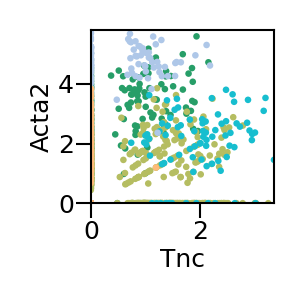

In [449]:
sc.settings.set_figure_params(dpi=150, dpi_save= 300, fontsize=6, frameon=True, figsize=(2, 2), transparent=False, format="pdf")
fig, ax = plt.subplots(figsize = (1, 1))
plt.margins(x=0, y=0)
ax.tick_params(axis='both', which='major', pad=0.5)
plt.grid(b=None)
ax.set_axisbelow(True)
plt.setp(ax.spines.values(), linewidth=0.5)
ax.tick_params(width=0.5)
sc.pl.scatter(small_muscle[small_muscle.obs["clusters_muscle_leiden_0.7"].isin([
            "Mesenchymal progenitors-3",
             "Pdgfra+ fibroblasts", 
             "Tnc+ myofibroblast-like cells",
            "Smooth muscle-3 (Villus axial)",
             "Pericytes"])], x="Tnc", y="Acta2", size=10, color="clusters_muscle_leiden_0.7", ax = ax, show=False, title="")
plt.legend(ncol=1, prop={'size': 6}, handletextpad=0.5, markerscale = 2.0, frameon = False, labelspacing = 0.2, bbox_to_anchor = (1.0,1.0))
ax.get_legend().remove()
plt.xlabel("Tnc", labelpad=1)
plt.ylabel("Acta2", labelpad=1)
plt.tight_layout()
# plt.show()
plt.savefig("figures/scatter_acta2_Tnc.pdf", facecolor='w', edgecolor='w',
        orientation='potrait', format="pdf",
        transparent=True, metadata=None)

/home/mm2937/miniconda3/envs/python385/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


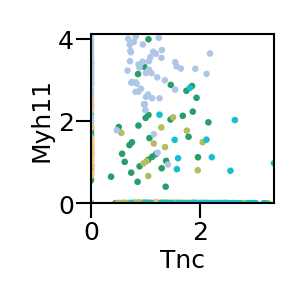

In [450]:
sc.settings.set_figure_params(dpi=150, dpi_save= 300, fontsize=6, frameon=True, figsize=(2, 2), transparent=False, format="pdf")
fig, ax = plt.subplots(figsize = (1.0, 1.0))
plt.margins(x=0, y=0)
ax.tick_params(axis='both', which='major', pad=0.5)
plt.grid(b=None)
ax.set_axisbelow(True)
plt.setp(ax.spines.values(), linewidth=0.5)
ax.tick_params(width=0.5)
sc.pl.scatter(small_muscle[small_muscle.obs["clusters_muscle_leiden_0.7"].isin([
            "Mesenchymal progenitors-3",
             "Pdgfra+ fibroblasts", 
             "Tnc+ myofibroblast-like cells",
            "Smooth muscle-3 (Villus axial)",
             "Pericytes"])], x="Tnc", y="Myh11", size=10, color="clusters_muscle_leiden_0.7", ax = ax, show=False, title="")
plt.legend(ncol=1, prop={'size': 6}, handletextpad=0.5, markerscale = 2.0, frameon = False, labelspacing = 0.2, bbox_to_anchor = (1.0,1.0))
ax.get_legend().remove()

plt.xlabel("Tnc", labelpad=1)
plt.ylabel("Myh11", labelpad=1)
plt.tight_layout()
# plt.show()
plt.savefig("figures/scatter_tnc_myh11.pdf", facecolor='w', edgecolor='w',
        orientation='potrait', format="pdf",
        transparent=True, metadata=None)

/home/mm2937/miniconda3/envs/python385/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


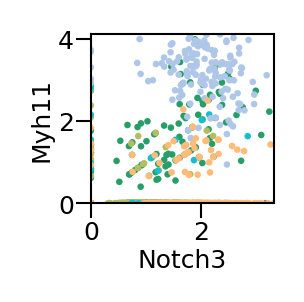

In [451]:
sc.settings.set_figure_params(dpi=150, dpi_save= 300, fontsize=6, frameon=True, figsize=(2, 2), transparent=False, format="pdf")
fig, ax = plt.subplots(figsize = (1.0, 1.0))
plt.margins(x=0, y=0)
ax.tick_params(axis='both', which='major', pad=0.5)
plt.grid(b=None)
ax.set_axisbelow(True)
plt.setp(ax.spines.values(), linewidth=0.5)
ax.tick_params(width=0.5)
sc.pl.scatter(small_muscle[small_muscle.obs["clusters_muscle_leiden_0.7"].isin([
            "Mesenchymal progenitors-3",
             "Pdgfra+ fibroblasts", 
             "Tnc+ myofibroblast-like cells",
            "Smooth muscle-3 (Villus axial)",
             "Pericytes"])], x="Notch3", y="Myh11", size=10, color="clusters_muscle_leiden_0.7", ax = ax, show=False, title="")
plt.legend(ncol=1, prop={'size': 6}, handletextpad=0.5, markerscale = 2.0, frameon = False, labelspacing = 0.2, bbox_to_anchor = (1.0,1.0))
ax.get_legend().remove()

plt.xlabel("Notch3", labelpad=1)
plt.ylabel("Myh11", labelpad=1)
plt.tight_layout()
# plt.show()
plt.savefig("figures/scatter_notch3_myh11.pdf", facecolor='w', edgecolor='w',
        orientation='potrait', format="pdf",
        transparent=True, metadata=None)

/home/mm2937/miniconda3/envs/python385/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


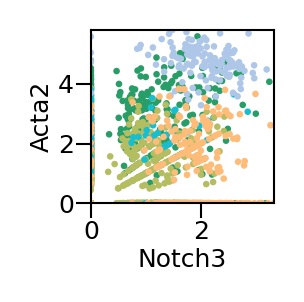

In [452]:
sc.settings.set_figure_params(dpi=150, dpi_save= 300, fontsize=6, frameon=True, figsize=(2, 2), transparent=False, format="pdf")
fig, ax = plt.subplots(figsize = (1.0, 1.0))
plt.margins(x=0, y=0)
ax.tick_params(axis='both', which='major', pad=0.5)
plt.grid(b=None)
ax.set_axisbelow(True)
plt.setp(ax.spines.values(), linewidth=0.5)
ax.tick_params(width=0.5)
sc.pl.scatter(small_muscle[small_muscle.obs["clusters_muscle_leiden_0.7"].isin([
            "Mesenchymal progenitors-3",
             "Pdgfra+ fibroblasts", 
             "Tnc+ myofibroblast-like cells",
            "Smooth muscle-3 (Villus axial)",
             "Pericytes"])], x="Notch3", y="Acta2", size=10, color="clusters_muscle_leiden_0.7", ax = ax, show=False, title="")
plt.legend(ncol=1, prop={'size': 6}, handletextpad=0.5, markerscale = 2.0, frameon = False, labelspacing = 0.2, bbox_to_anchor = (1.0,1.0))
ax.get_legend().remove()

plt.xlabel("Notch3", labelpad=1)
plt.ylabel("Acta2", labelpad=1)
plt.tight_layout()
# plt.show()
plt.savefig("figures/scatter_notch3_Acta2.pdf", facecolor='w', edgecolor='w',
        orientation='potrait', format="pdf",
        transparent=True, metadata=None)